# CS2006 Practical 3

This Jupyter notebook provides an analysis of a data sample taken from the 2011 UK census containing 569,741 individuals.  Each individual in the dataset has 18 properties, which include age, sex, religion and economic activity.

The dataset and related information are available at www.ons.gov.uk/census/2011census.

The analysis has been conducted in Python, primarily making use of the data processing library `pandas` and plotting library `matplotlib`.  These libraries have been used to provide a descriptive and graphical analysis of important trends and features of the dataset.

The following requirements have been implemented:

Basic Requirements:

1. Refine the dataset, checking for inconsistencies.
2. Descriptive analysis of parts of the dataset.
3. Frequency plots and pie charts to reveal interesting trends.

Additional Requirements:

1. (Easy) Produce two-way frequency tables of specific pairs of variables.
2. (Easy) Perform queries on the dataset to extract relevant information.
3. (Medium) Represent the tables from 1. as 3D plots.
4. (Medium) Use ipywidgets to construct interactive plots that change based on a user-defined selection.
5. (Hard) Use a map to interpret and show data.
6. (Hard) Conduct an analysis on another large dataset.
7. (Hard) Use Binder (www.mybinder.com) to provide a complete environment for reproducing the analysis.

The following import statements are required for the analysis:

In [1]:
# Force plots to appear within Jupyter notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data processing libraries.
import pandas as pd
import numpy as np
pd.Series.__unicode__ = pd.Series.to_string

# Plotting libraries.
import matplotlib as mpl
import matplotlib.pyplot as plt

# ipywidgets functionality.
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipykernel.pylab.backend_inline import flush_figures

# User defined utilities.
import src.utils as utils
import src.refine as refine
import src.descriptive as descriptive
import src.plotting as plotting
import src.plotting_3D as plotting_3D
import src.cricket as cricket

# Check for the presence of mapping capabilities.
mapping_installed = True
try:
    import src.mapping as mapping
except ImportError:
    mapping_installed = False

# Built-in utilities.
import copy
import inspect

# Set the style for all forthcoming plots.
plt.style.use('ggplot')

## Basic Requirements
### 1. Dataset refinement
The dataset was read using a `pandas` function:

In [2]:
df = pd.read_csv("./data/census2011.csv")
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


The dataset was then refined using a series of functions that checked for missing values, values that were outside their specified ranges, and duplicate values.  This code is contained in the module `refine.py`, which is reproduced below:

In [3]:
print(inspect.getsource(refine))

"""Module containing functions to refine a dataset."""

import pandas as pd


def filter_null(df, variable):
    """Return records not containing null values in a specified column."""

    return df[pd.notnull(df[variable])]


def filter_type(df, variable, type_list):
    """Return records where a specified variable is in a specified set of values."""

    return df[df[variable].isin(type_list)]


def filter_digits(df, variable, max_digit, no_code):
    """Return records where digits are within a range or a specified 'no code' value."""

    if no_code is not None:
        return df[(df[variable].isin(range(0, max_digit + 1))) | (df[variable] == no_code)]
    else:
        return df[df[variable].isin(range(0, max_digit + 1))]


def filter_all_types(df, all_types):
    """Return records where a list of types are filtered on."""

    for type_list in all_types:
        return filter_type(df, *type_list)


def filter_digit_variables(df, digit_variables):
    """Return records where a list

Refining the dataset in this way produced an almost identical dataset:

In [4]:
df = refine.refine_data(df)
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


All codes in the dataset were then translated ino their corresponding values, as defined by the census parameters.  This translation step was conducted early in the analysis to ensure that future output was easily readable.  It must be noted that this choice represents a tradeoff between convenience and speed/memory usage.

In [5]:
df_translated = utils.translate(df)
df_translated.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,North East,Not Resident,Married/Civil Partnership,Usual Resident,Female,55 to 64,Married/Civil Partnership,False,UK,Good Health,White,Christian,Retired,"Process, Plant and Machine Operatives",Mining and Quarrying,No Code Required,DE
1,7394745,North East,Not Resident,Lone Parent Family (Female),Usual Resident,Male,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,Christian,Employee,"Process, Plant and Machine Operatives",Transport and Storage,49 or More Hours,C2
2,7395066,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,No Religion,Employee,"Caring, Leisure and Other Service",Human Health and Social Work,31 to 48 Hours,DE
3,7395329,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,16 to 24,Single (Never Married/Civil Partnership),False,UK,Good Health,White,Christian,Employee,Sales and Customer Service,Financial and Insurance,31 to 48 Hours,C1
4,7394712,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Male,45 to 54,Divorced or Formerly in a Civil Partnership,False,UK,Very Good Health,White,Christian,Employee,"Managers, Directors and Senior Officials",Wholesale and Retail Trade,31 to 48 Hours,C1


### 2. Descriptive analysis

A descriptive analysis of the dataset was then conducted using a number of modular functions:

In [6]:
print(inspect.getsource(descriptive))

"""Module with functions for a descriptive analyses of a dataset."""

import pandas as pd


def total_records(df):
    """Return message for total number of records in dataframe."""

    return "The total number of records in the dataframe is " + str(len(df)) + '.'

def all_data_types(df):
    """Return message for all data types in a dataframe."""

    return "All data types:\n" + str(df.dtypes)

def count_occurrences(df, ignore_variables):
    """Strip PersonID column, count values, and return message."""

    result = ""
    for column in df:
        if column not in ignore_variables:
            result += str(column) + " counts:\n" + str(df[column].value_counts()) + "\n" * 2

    return result



The descriptive analyses found the number of records in the dataset, the data types of each variable, and the number of observations of each unqiue value:

In [7]:
print(descriptive.total_records(df_translated) + "\n")
print(descriptive.all_data_types(df_translated) + "\n")
print(descriptive.count_occurrences(df_translated, ["Person ID"]))

The total number of records in the dataframe is 569740.

All data types:
Person ID                     int64
Region                       object
Residence Type               object
Family Composition           object
Population Base              object
Sex                          object
Age                          object
Marital Status               object
Student                        bool
Country of Birth             object
Health                       object
Ethnic Group                 object
Religion                     object
Economic Activity            object
Occupation                   object
Industry                     object
Hours worked per week        object
Approximated Social Grade    object

Region counts:
South East                  88083
London                      83582
North West                  71436
East of England             59411
West Midlands               56875
South West                  53774
Yorkshire and the Humber    53471
East Midlands            

### 3. Plotting

For plotting frequency counts and pie charts of a single variable, modular functions were written:

In [8]:
print(inspect.getsource(plotting))

"""Module for plotting basic frequency counts and pie charts grouped by one factor."""

import matplotlib.pyplot as plt
import textwrap


def plot_bar_group_count(
        data, field, title, title_pad=1.05, label_pad=15, wrap_chars=10
):
    """Plot a bar chart of frequencies, grouped by one factor."""

    # Get the frequencies.
    sizes = data.groupby(field).size()

    # Create axes and labels.
    axes = sizes.plot.barh()
    axes.set_title(title, y=title_pad)
    axes.set_xlabel("Frequency", labelpad=label_pad)
    axes.set_ylabel(field, labelpad=label_pad)

    # Create axes tick mark labels, with text wrapping.
    labels = ['\n'.join(textwrap.wrap(str(label), wrap_chars, break_long_words=False)) for label in sizes.keys()]
    axes.set_yticklabels(labels)

    return axes


def plot_pie_group_count(
        data, field, title, percent_format="%1.1f%%", title_pad=1.1
):
    """Plot a pie chart of frequencies, grouped by one factor."""

    # Get the frequencies.
    sizes = dat

According to the sample data, the South East of England and London have the highest populations (shown in the plot below).  Wales and the North East of England have the smallest populations in the UK.

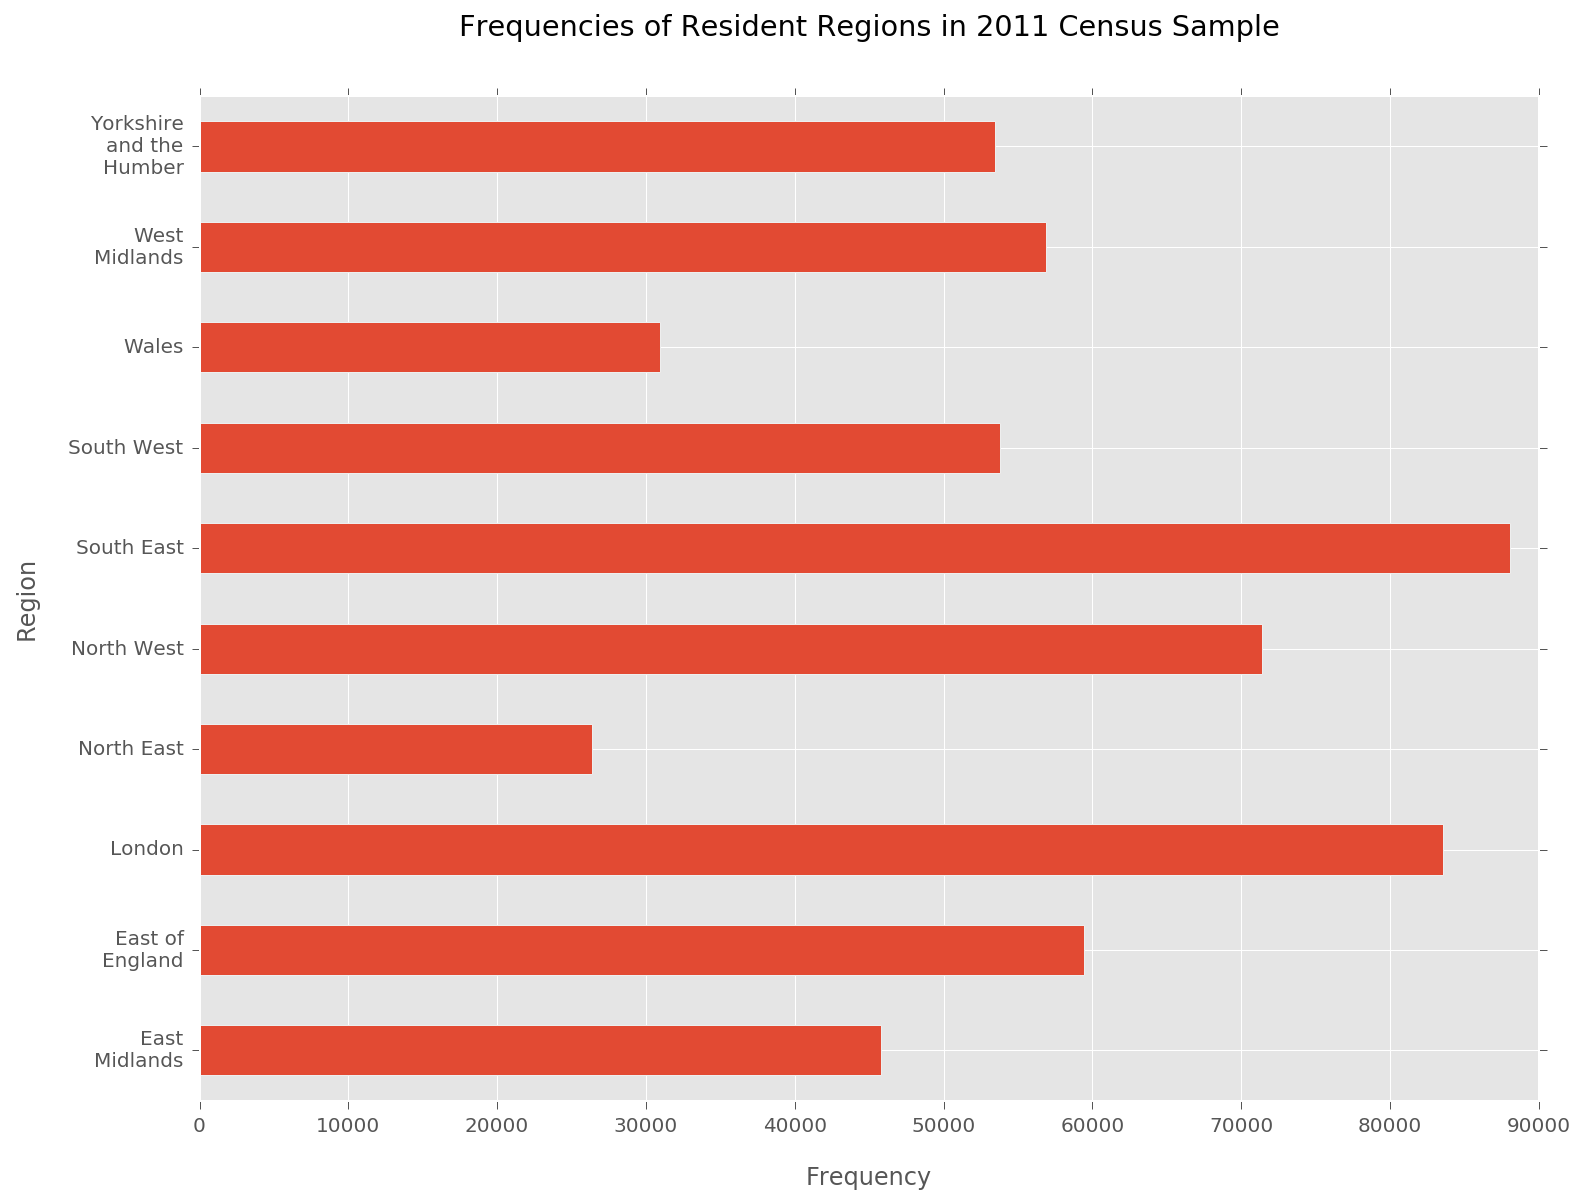

In [9]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    df_translated,
    'Region',
    'Frequencies of Resident Regions in 2011 Census Sample',
);

The largest employment group corresponds to the one with no code required, meaning that the largest group of people is the one containing those under 16, those who have never worked, and students or schoolchildren living away during the term-time.  Within the rest of the data, The largest groups are elementary occupations or professional groups.  The smallest group is the process, plant, and machine operatives.

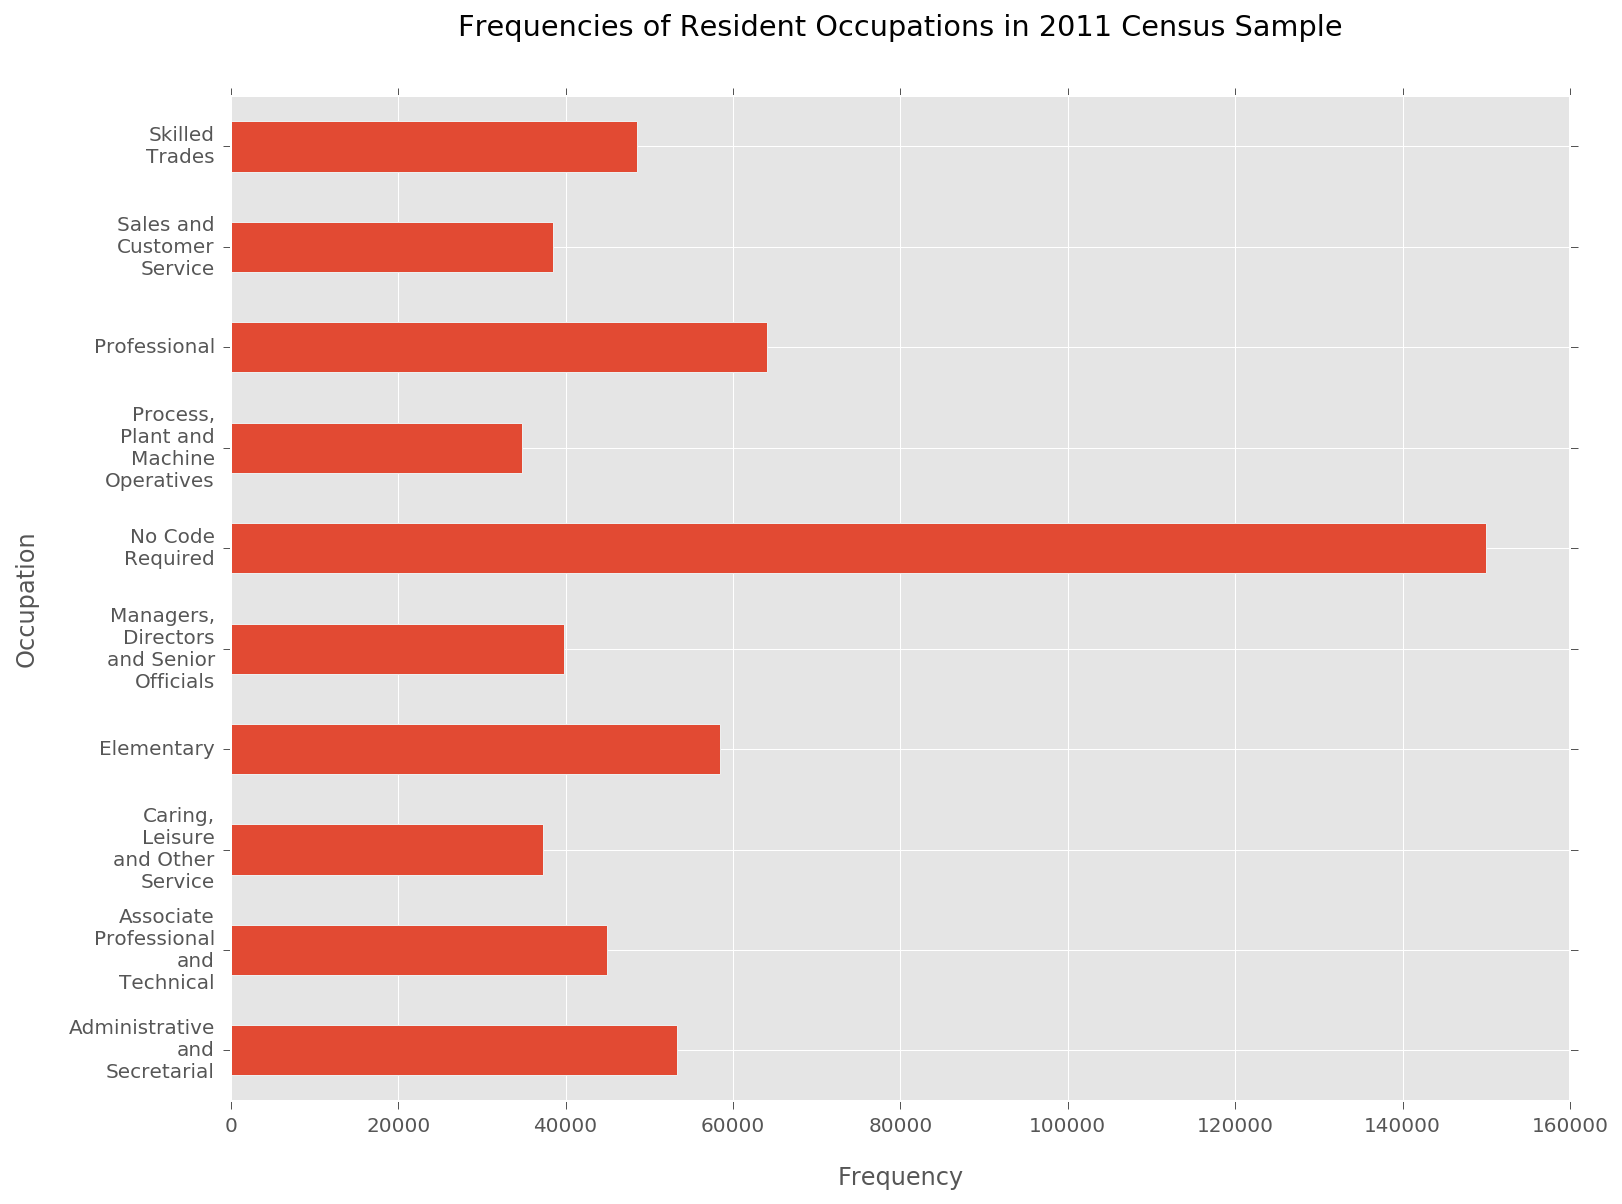

In [10]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    df_translated,
    'Occupation',
    'Frequencies of Resident Occupations in 2011 Census Sample',
);

With respect to age, the largest group is the one containing children under the age of 15.  The smallest group contains those people over the age of 75.  An interesting point to note is that for groups within the bounds of 16 and 64 years, the frequency counts are very similar.

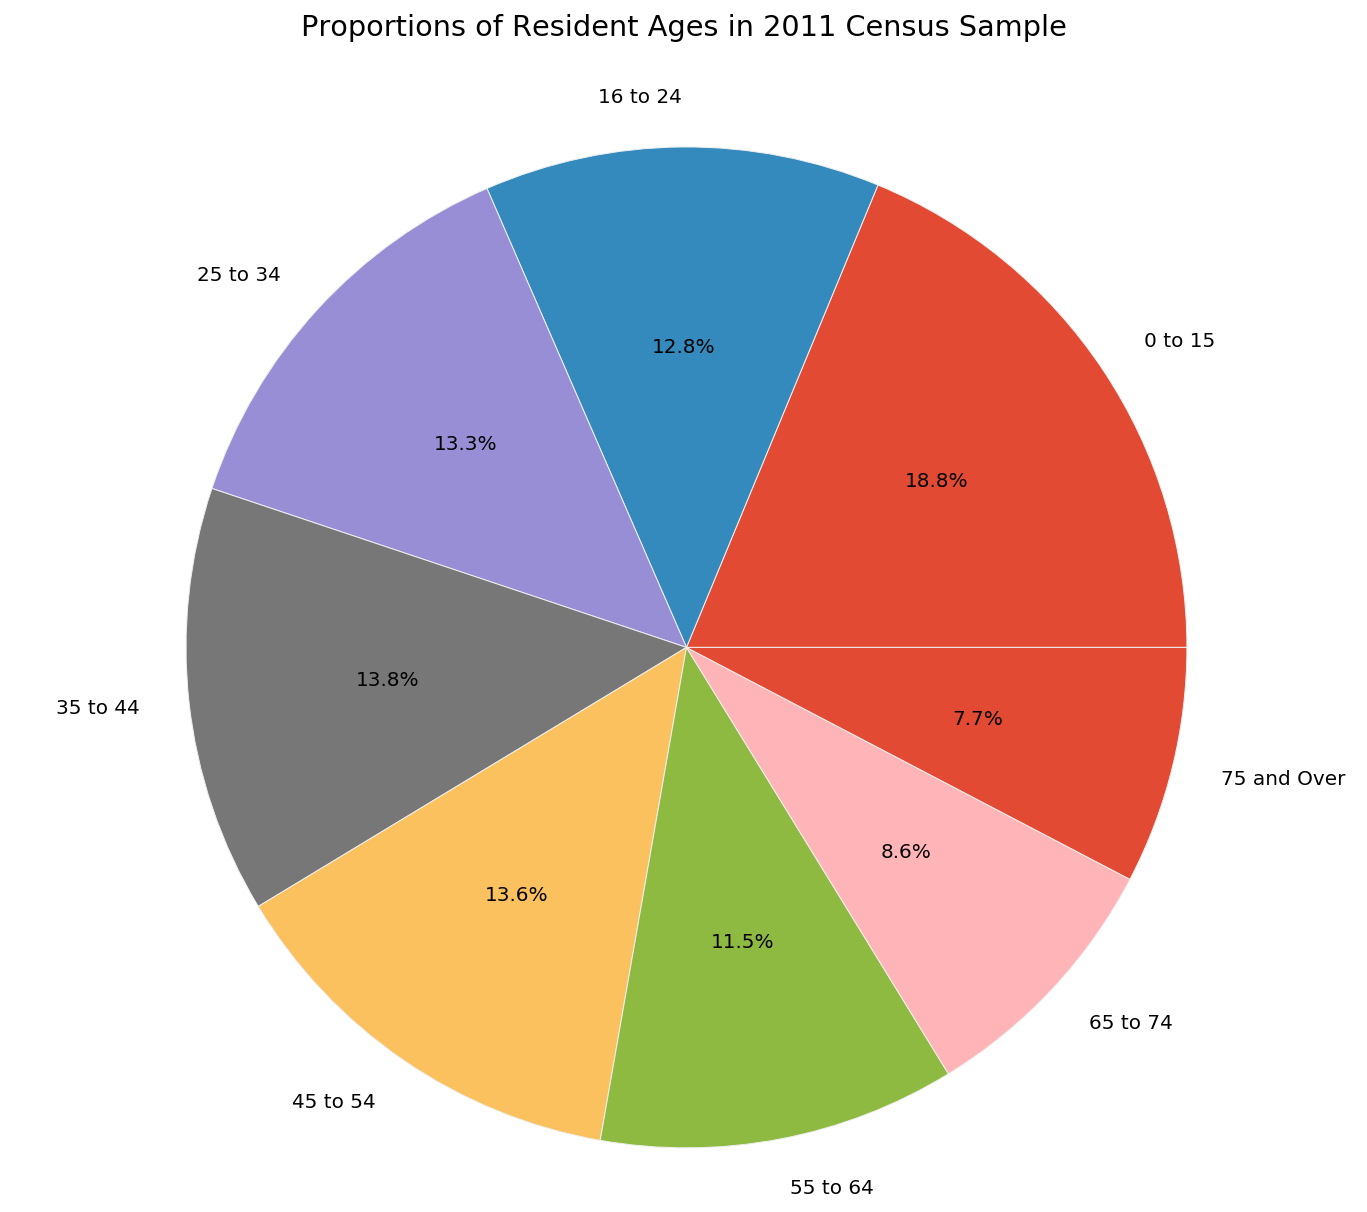

In [11]:
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    df_translated,
    'Age',
    'Proportions of Resident Ages in 2011 Census Sample',
);

Examining the proportions of the sample by their economic activity, the largest group is the group of people by far is those who are employed.  The second largest group is the group for which there is no code, which means that they are children under the age of 16, full time students, or schoolchildren who live elsewhere during term-time.  There is also a large group of those who are retired, which captures the nature of the aging population in the UK.  Aside from these observations, the group sizes are fairly similar -- and range from around 2% of the total to 7% of the total.

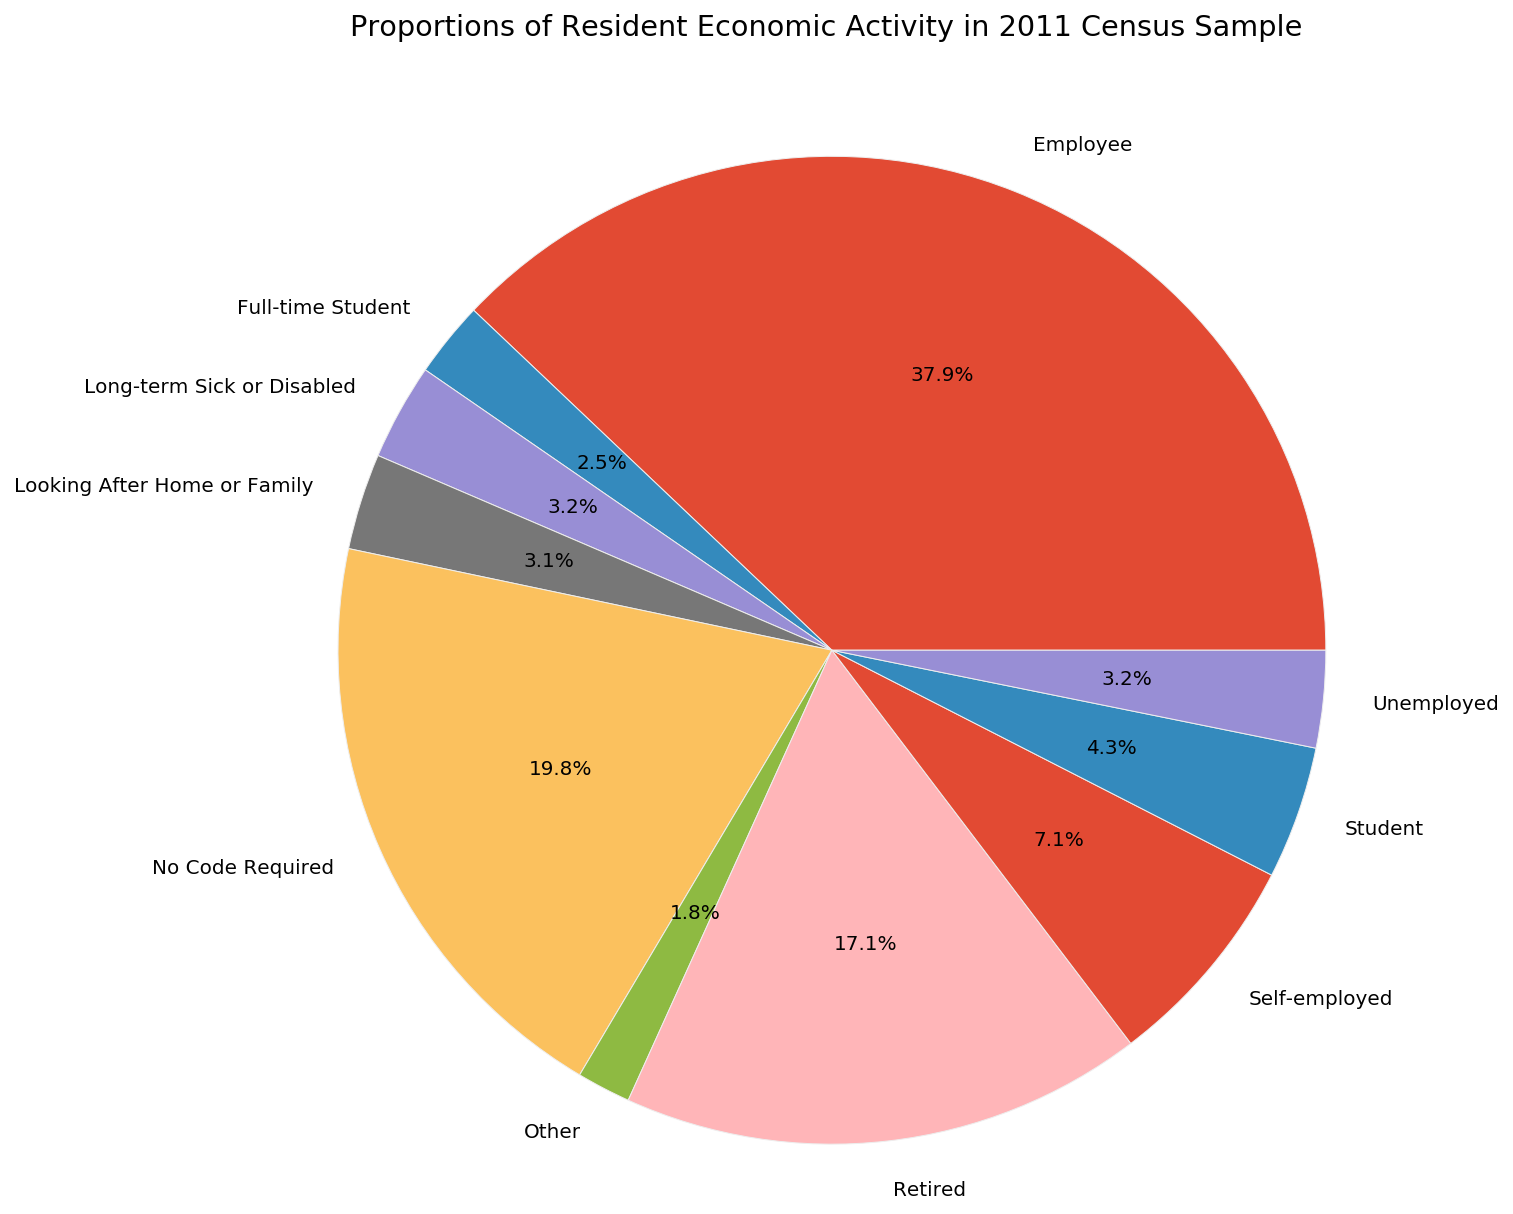

In [12]:
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    df_translated,
    'Economic Activity',
    'Proportions of Resident Economic Activity in 2011 Census Sample',
);

## Additional Requirements
### 1. Two-way frequency tables

For producing the following two-way frequency tables, the `pandas` function `crosstab` was used.

For all industries aside from agriculture, London has a far higher number of the working population than the rest of the regions -- especially the North East of England, which has a significantly lower number of people working in all industries than the rest of the country.  In addition, agriculture is the industry with the fewest workers.

In [13]:
pd.crosstab(df_translated['Region'], df_translated['Industry'])

Industry,Accommodation and Food Service,"Agriculture, Forestry and Fishing",Construction,Education,Financial and Insurance,Human Health and Social Work,Mining and Quarrying,No Code Required,"Other Community, Social and Personal Service",Public Adminstration and Defence,Real Estate,Transport and Storage,Wholesale and Retail Trade
Region,,,,,,,,,,,,,
East Midlands,1936,429,2500,3280,844,3952,6057,11669,1414,1751,3299,2518,6133
East of England,2336,616,3508,4291,2199,4977,5302,14748,2111,2514,5465,3841,7503
London,4054,55,3700,5373,4016,6109,3266,25517,3735,3015,9968,6570,8204
North East,1300,132,1574,1836,524,2524,2851,6854,848,1498,1883,1438,3087
North West,3355,357,3778,4890,1597,6764,7726,18755,2299,3096,5822,3981,9016
South East,3566,510,4895,6593,3059,7344,6651,22246,3316,4145,8708,6502,10548
South West,2712,697,3033,4039,1510,5085,5012,12401,1977,2973,4475,2961,6899
Wales,1641,403,1731,2313,594,2887,3504,7937,992,1714,2010,1500,3751
West Midlands,2281,396,2960,3984,1149,4848,7108,15768,1828,2061,4284,3141,7067


Examining a two-way frequency table of approximated social grade and occuption, by far the most frequent combination is where no code is required for either.  As the social grades change, the most frequent occupation in that group also changes.  For example: in the social group AB (the highest social code) the largest numbers of people are employed in managerial/professional occupations (generally high paying jobs), whereas in the social code DE (the lowest social code) the highest numbers of people seen to be employed in elementary/process operatives occupations (which tends to be lower paid).

In [14]:
pd.crosstab(df_translated['Occupation'], df_translated['Approximated Social Grade'])

Approximated Social Grade,AB,C1,C2,DE,No Code Required
Occupation,,,,,
Administrative and Secretarial,3000,44922,2353,2252,727
Associate Professional and Technical,7050,35435,647,986,819
"Caring, Leisure and Other Service",1061,6343,15555,13860,478
Elementary,902,7010,6500,42433,1638
"Managers, Directors and Senior Officials",19190,18555,584,967,492
No Code Required,1051,17787,2062,12169,116915
"Process, Plant and Machine Operatives",413,1719,11157,21087,441
Professional,48104,13223,891,1009,884
Sales and Customer Service,964,12184,2997,21347,1031


### 2. Dataset queries

This requirement revolved around filtering through data and returning insightful information.

Analysing the number of economically active people by region, we find that that the largest number of people live in the South East and London.  These locations both have the highest populations, and so this is the expected effect.

In [15]:
# Filter the dataset to only contain economically active individuals.
economic_activity = df[df["Economic Activity"].isin(range(1, 5))]
economic_activity = utils.translate(economic_activity)

pd.crosstab(index=economic_activity['Region'], columns='count')

col_0,count
Region,
East Midlands,23106
East of England,30568
London,44454
North East,12897
North West,35204
South East,45550
South West,27453
Wales,14877
West Midlands,27930


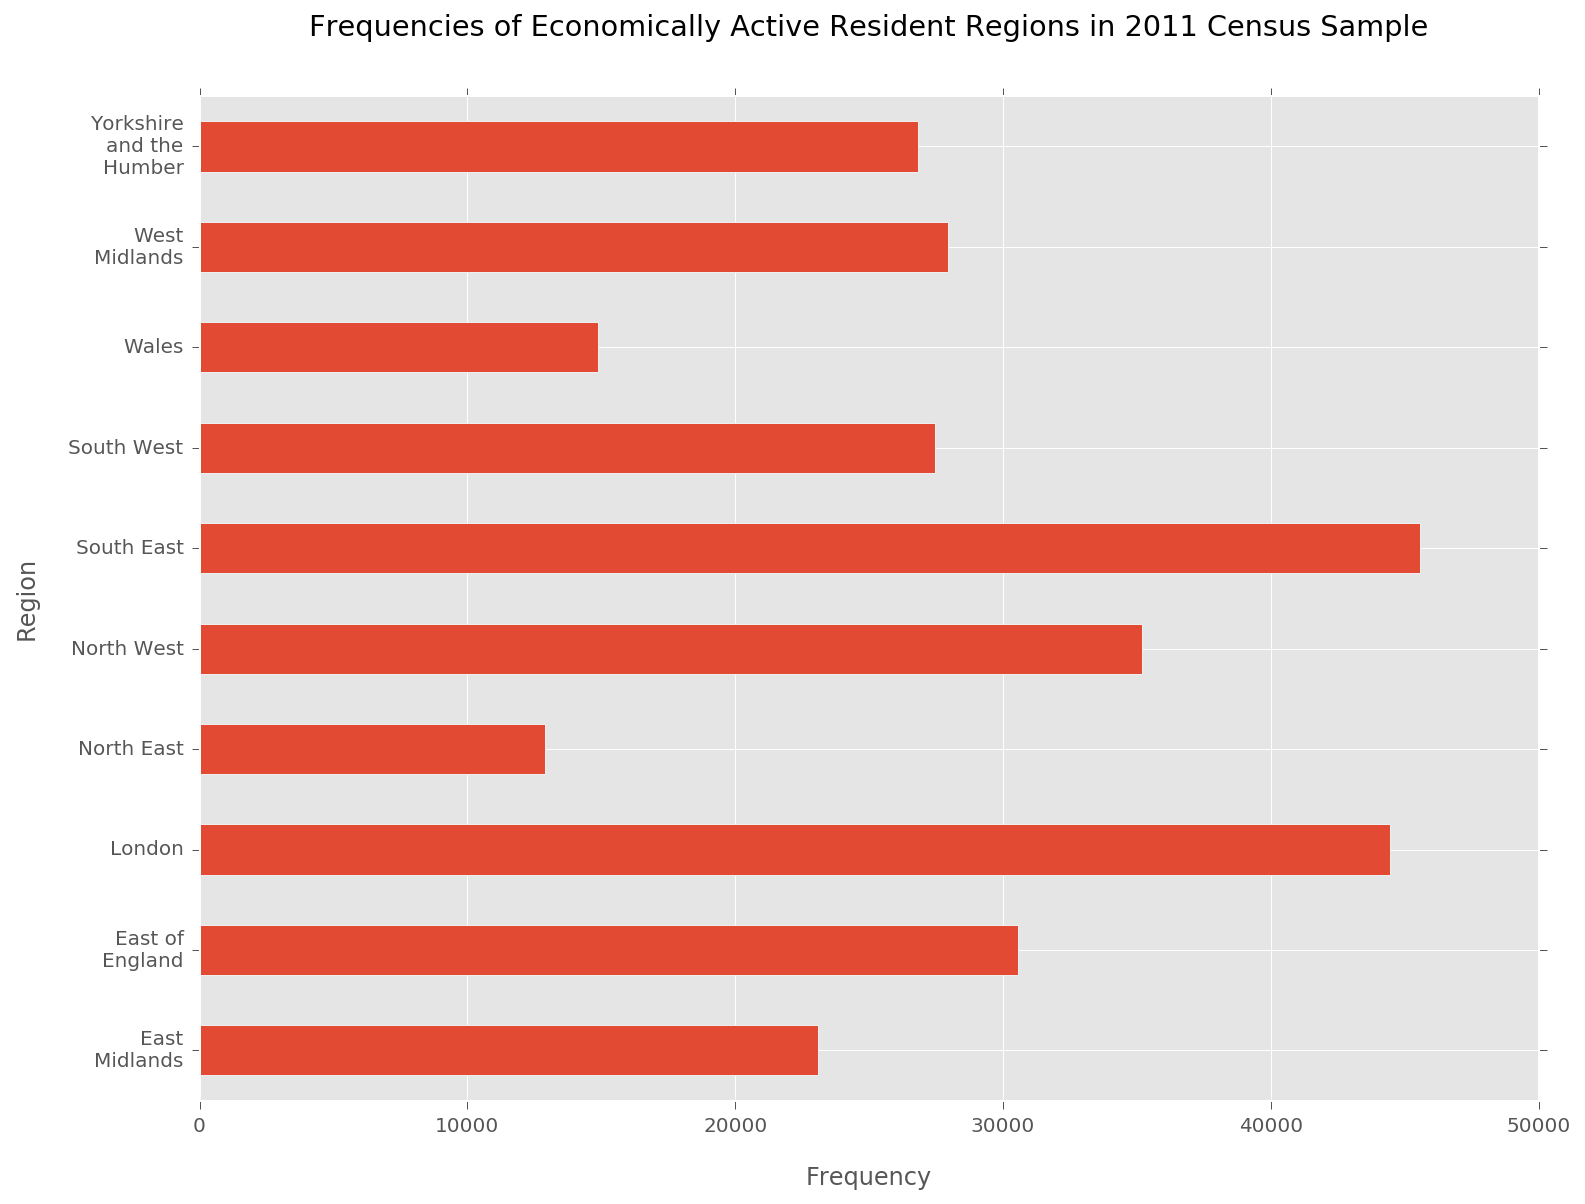

In [16]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    economic_activity,
    'Region',
    'Frequencies of Economically Active Resident Regions in 2011 Census Sample',
);

Examining the number of economically active people by age, the largest groups are those within the range of 25 to 64.  This is as would be expected, due to the largest total number of people being in those categories.  Furthermore, the number of economically people over the age of 65 is significantly lower -- again, as would be expected due to the proportion of these people who are retired.

In [17]:
pd.crosstab(index=economic_activity['Age'], columns='count')

col_0,count
Age,
16 to 24,41663
25 to 34,64326
35 to 44,67050
45 to 54,65736
55 to 64,40583
65 to 74,8022
75 and Over,1502


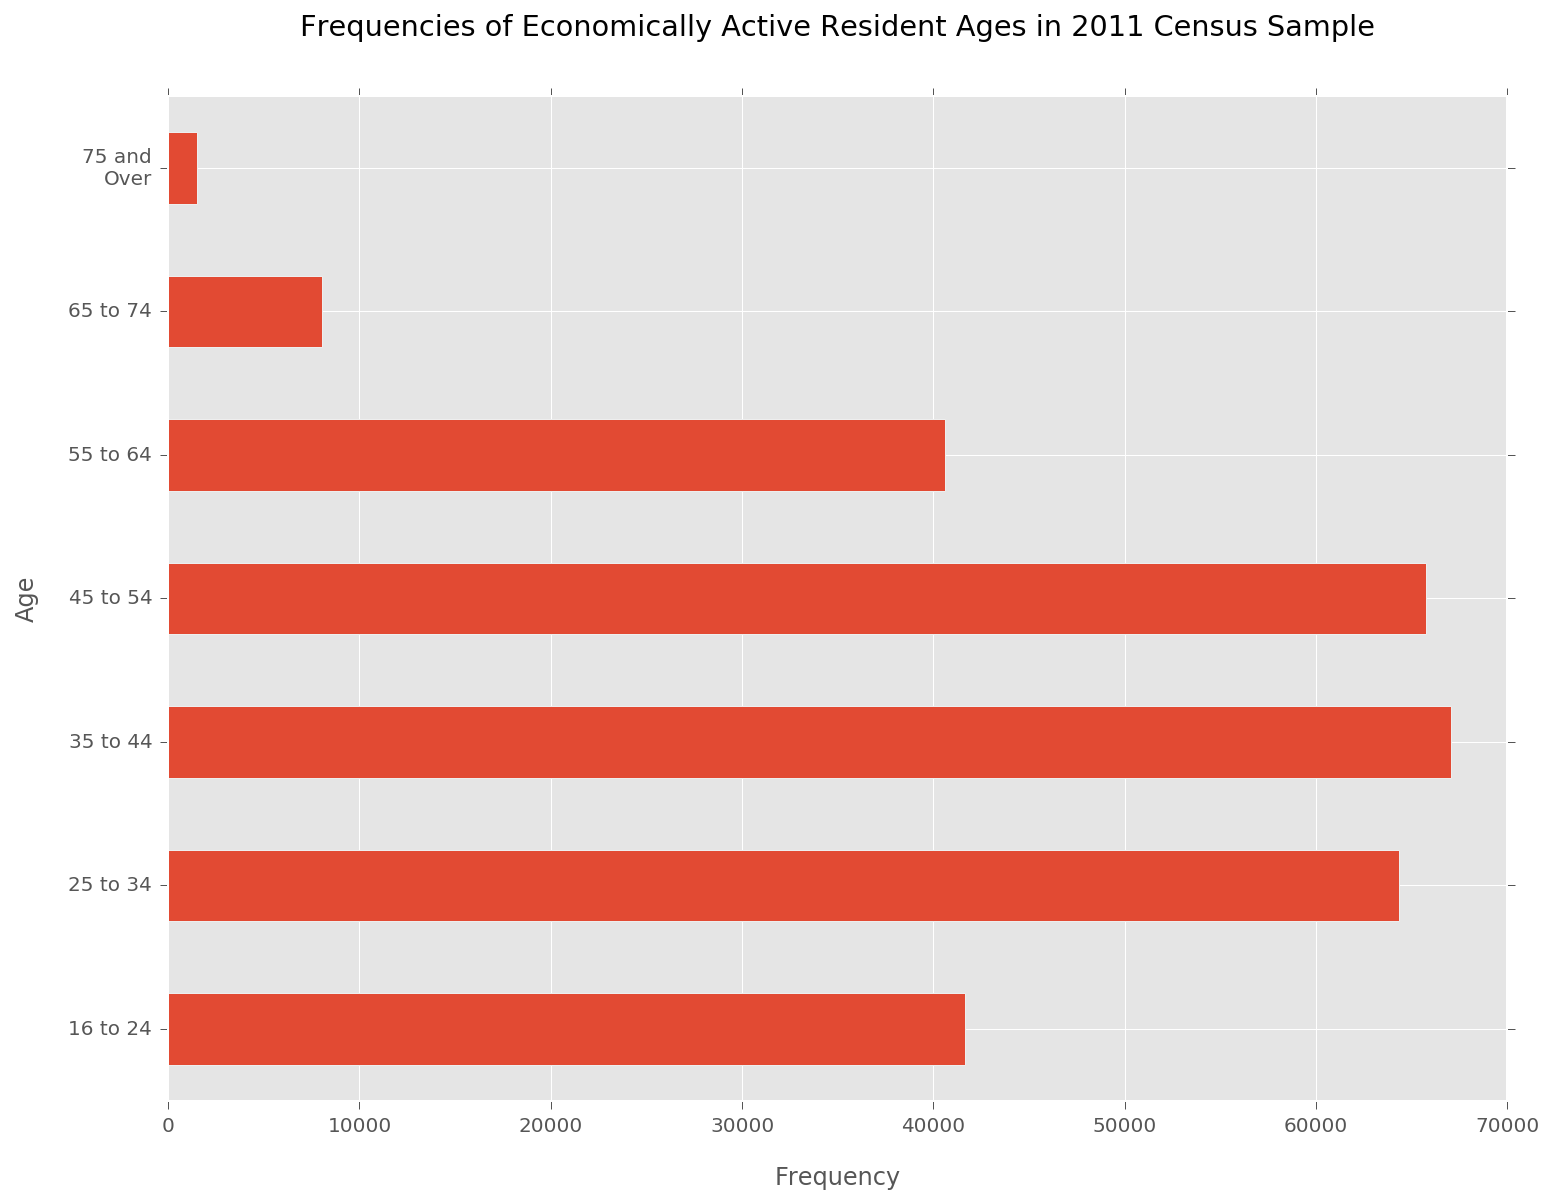

In [18]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    economic_activity,
    'Age',
    'Frequencies of Economically Active Resident Ages in 2011 Census Sample',
);

The next piece of analysis checks whether there are any discrepancies between the student status of an individual and their economic activity.  It would be illegal for a student to be anything other than an economically active (code 4) or economically inactive (code 6) student.  The analysis confirms that there are no conflicts, by filtering the dataset based on this query and checking the length of the resulting list of records.

In [19]:
def digit_discrepancies_query_filter(df, variable_a, values_a, variable_b, values_b):
    """Return records where two specified variables are in two specified sets."""

    return df[(df[variable_a].isin(values_a)) & (df[variable_b].isin(values_b))]

num_conflicting = len(digit_discrepancies_query_filter(df, "Student", [1], "Economic Activity", [1, 2, 3, 5, 7, 8, 9]))
print("There are " + str(num_conflicting) + " conflicting records.")

There are 0 conflicting records.


Additional analysis was conducted to calculate statistics relating to the hours worked by students.  The following analysis finds the average number of hours per week worked by all students, and the average number of hours worked by economically active students only.

In [20]:
def hours_categories(df):
    """Return a list of counts for the number of records in each working hours category."""

    codes = range(1, 5)

    return list(map(lambda i: len((df[df["Hours worked per week"] == i])), codes))


def elemwise_product(a, b):
    """Return the elementwise product of two arrays."""
    
    def product(t):
        x, y = t
        return x * y
    
    return sum(map(product, zip(a, b)))


# Extract dataframes for different classes of students.
df_students = df[df["Student"] == 1]
df_full_students = digit_discrepancies_query_filter(df_students, "Student", [1], "Economic Activity", [4])

# Retrieve the number of hours worked in each category by both datasets.
categories_students = hours_categories(df_students)
categories_full_students = hours_categories(df_full_students)

# Define the centre point of the hours categories.
num_hours_list = [7.5, 23, 39.5, 56.5]

# Calculate the total number of hours worked per student per week.
hours_students = elemwise_product(num_hours_list, categories_students) / len(df_students)
hours_full_students = elemwise_product(num_hours_list, categories_full_students) / len(df_full_students)

print("%.2f" % hours_students + " hours worked per week on average by all students.")
print("%.2f" % hours_full_students + " hours worked per week on average by economically active students.")

1.46 hours worked per week on average by all students.
13.07 hours worked per week on average by economically active students.


### 3. 3D plots

This section of analysis was conducted to represent the tables in additional requirement 1 as three dimensional plots.  The code used for this purpose is provided below.  The raw dataset (with codes instead of translated data values) was used to reduce clutter on the plot and make the labels easily visible.

In [21]:
print(inspect.getsource(plotting_3D))

"""Module for plotting two-way frequency tables as a 3D plot."""

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import textwrap


def plot_3d_table_count(
        data, field_1, field_2, title, xlabel, ylabel, title_pad=1.05,
        label_pad=20, alpha=0.8, wrap_chars=15, rotation=(30, 150)
):

    # Get frequency table.
    freq = pd.crosstab(data[field_1], data[field_2])

    # Create the grids giving the x and y values for each datapoint.
    x_grid, y_grid = np.meshgrid(range(len(freq.index)), range(len(freq.columns)))

    # Plot on 3D axes.
    axes = plt.axes(projection="3d")
    for x, y, z in zip(x_grid, y_grid, np.array(freq).T):
        axes.bar(x, z, zs=y, zdir='y', alpha=alpha)

    # Set relevant annotations.
    axes.set_title(title, y=title_pad)
    axes.set_xlabel(xlabel, labelpad=label_pad)
    axes.set_ylabel(ylabel, labelpad=label_pad)
    axes.set_zlabel("Frequency", labelpad=label_pad)
    axes.set_

First, we show a plot for the direct frequency comparison of region and industry.

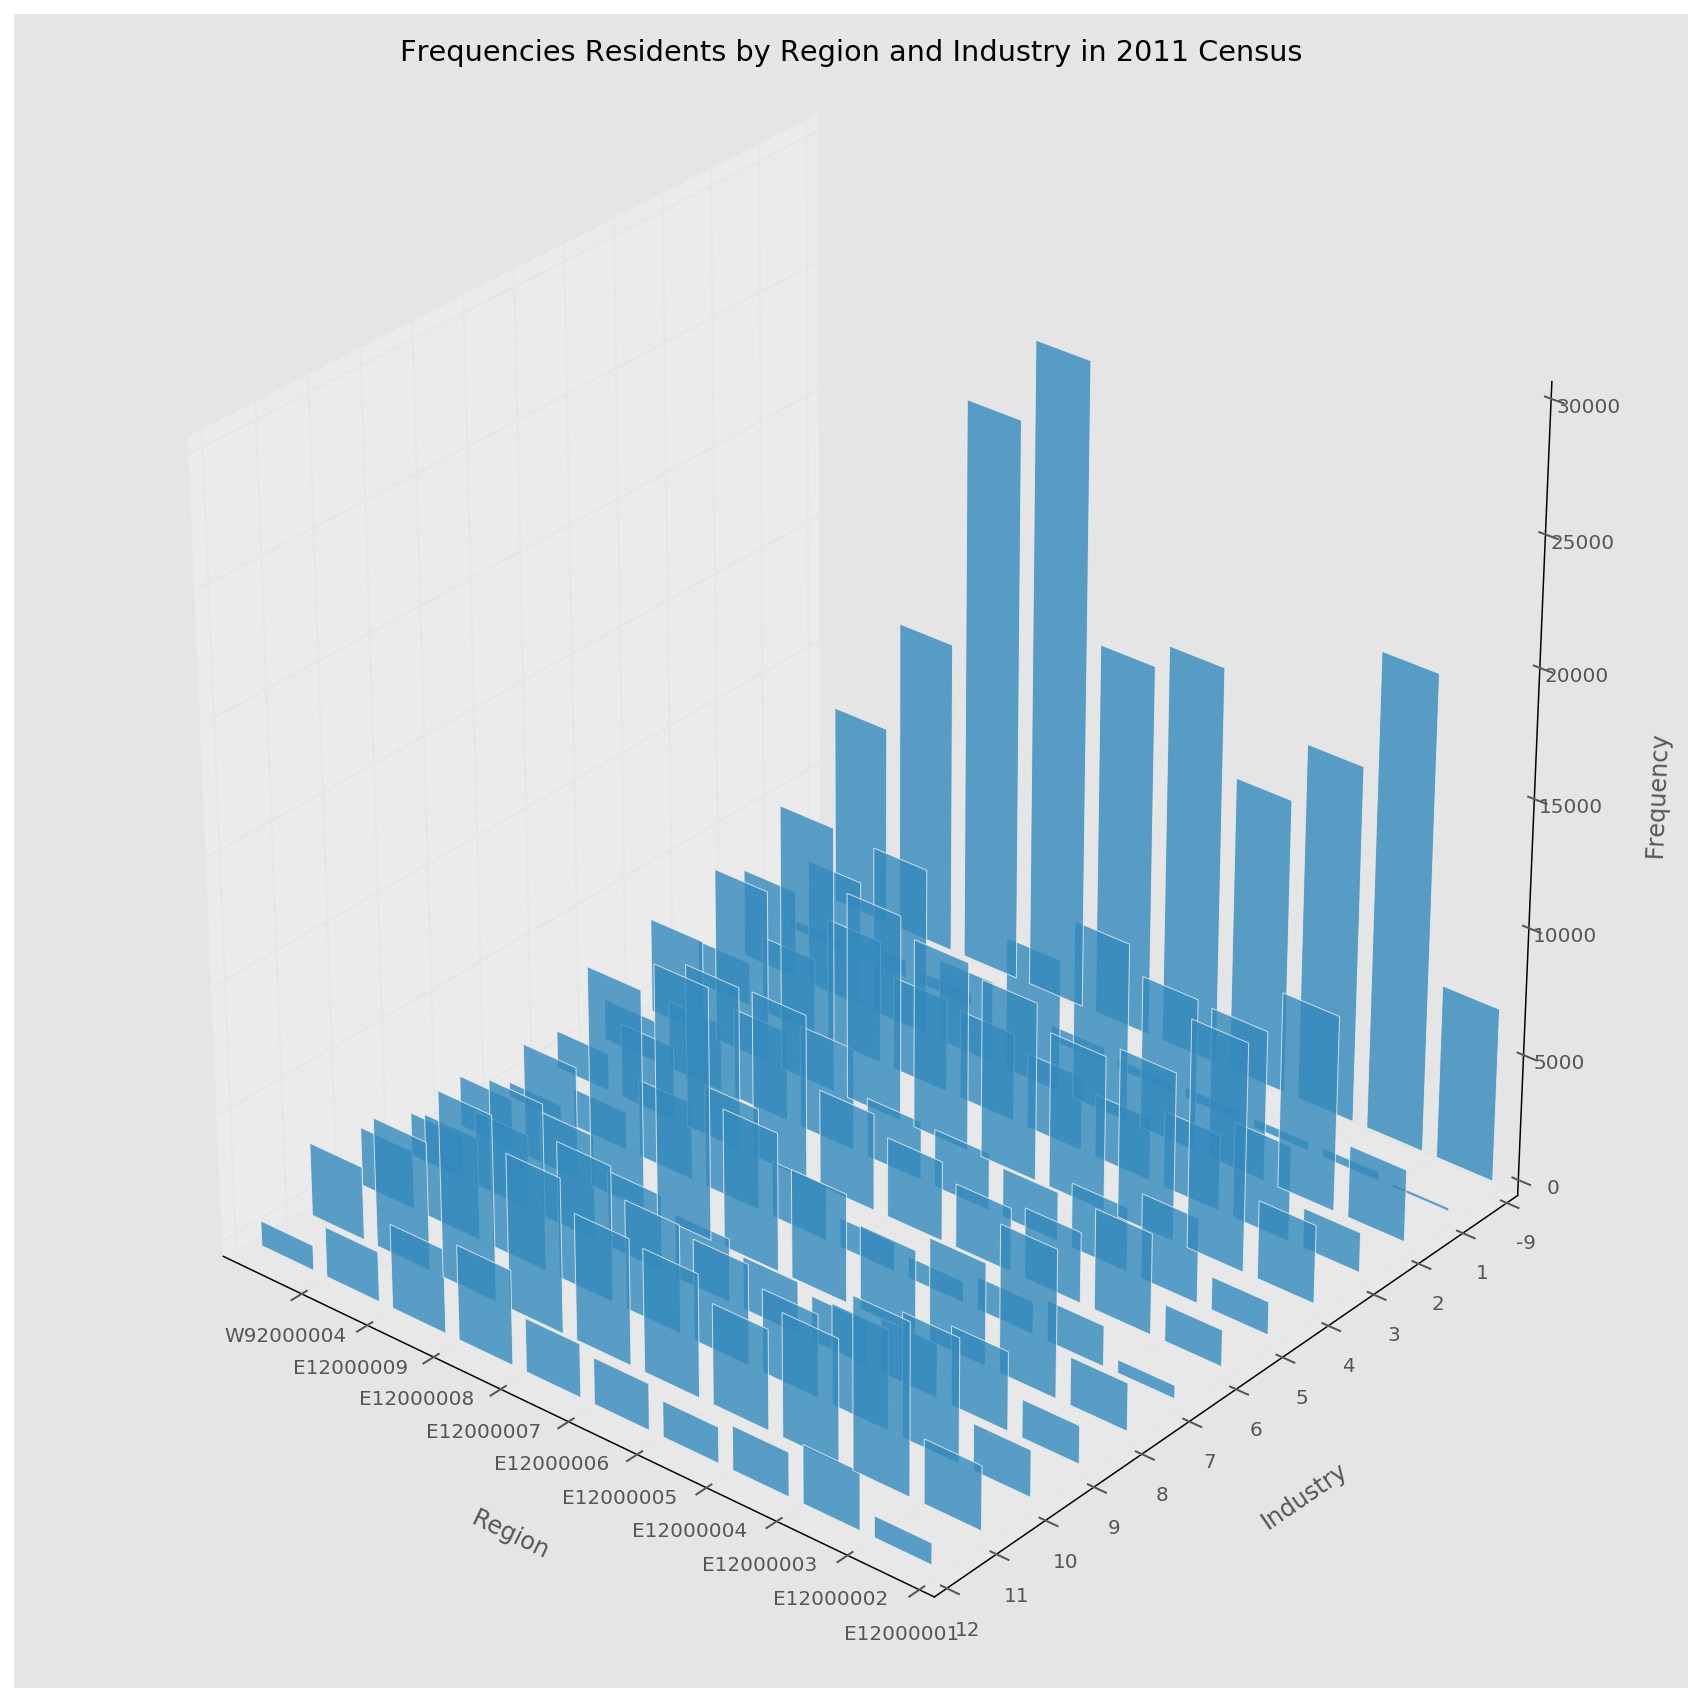

In [22]:
plt.figure(figsize=(15, 15))
plotting_3D.plot_3d_table_count(
        df,
        'Region',
        'Industry',
        'Frequencies Residents by Region and Industry in 2011 Census',
        'Region',
        'Industry',
        rotation=(30, 130)
);

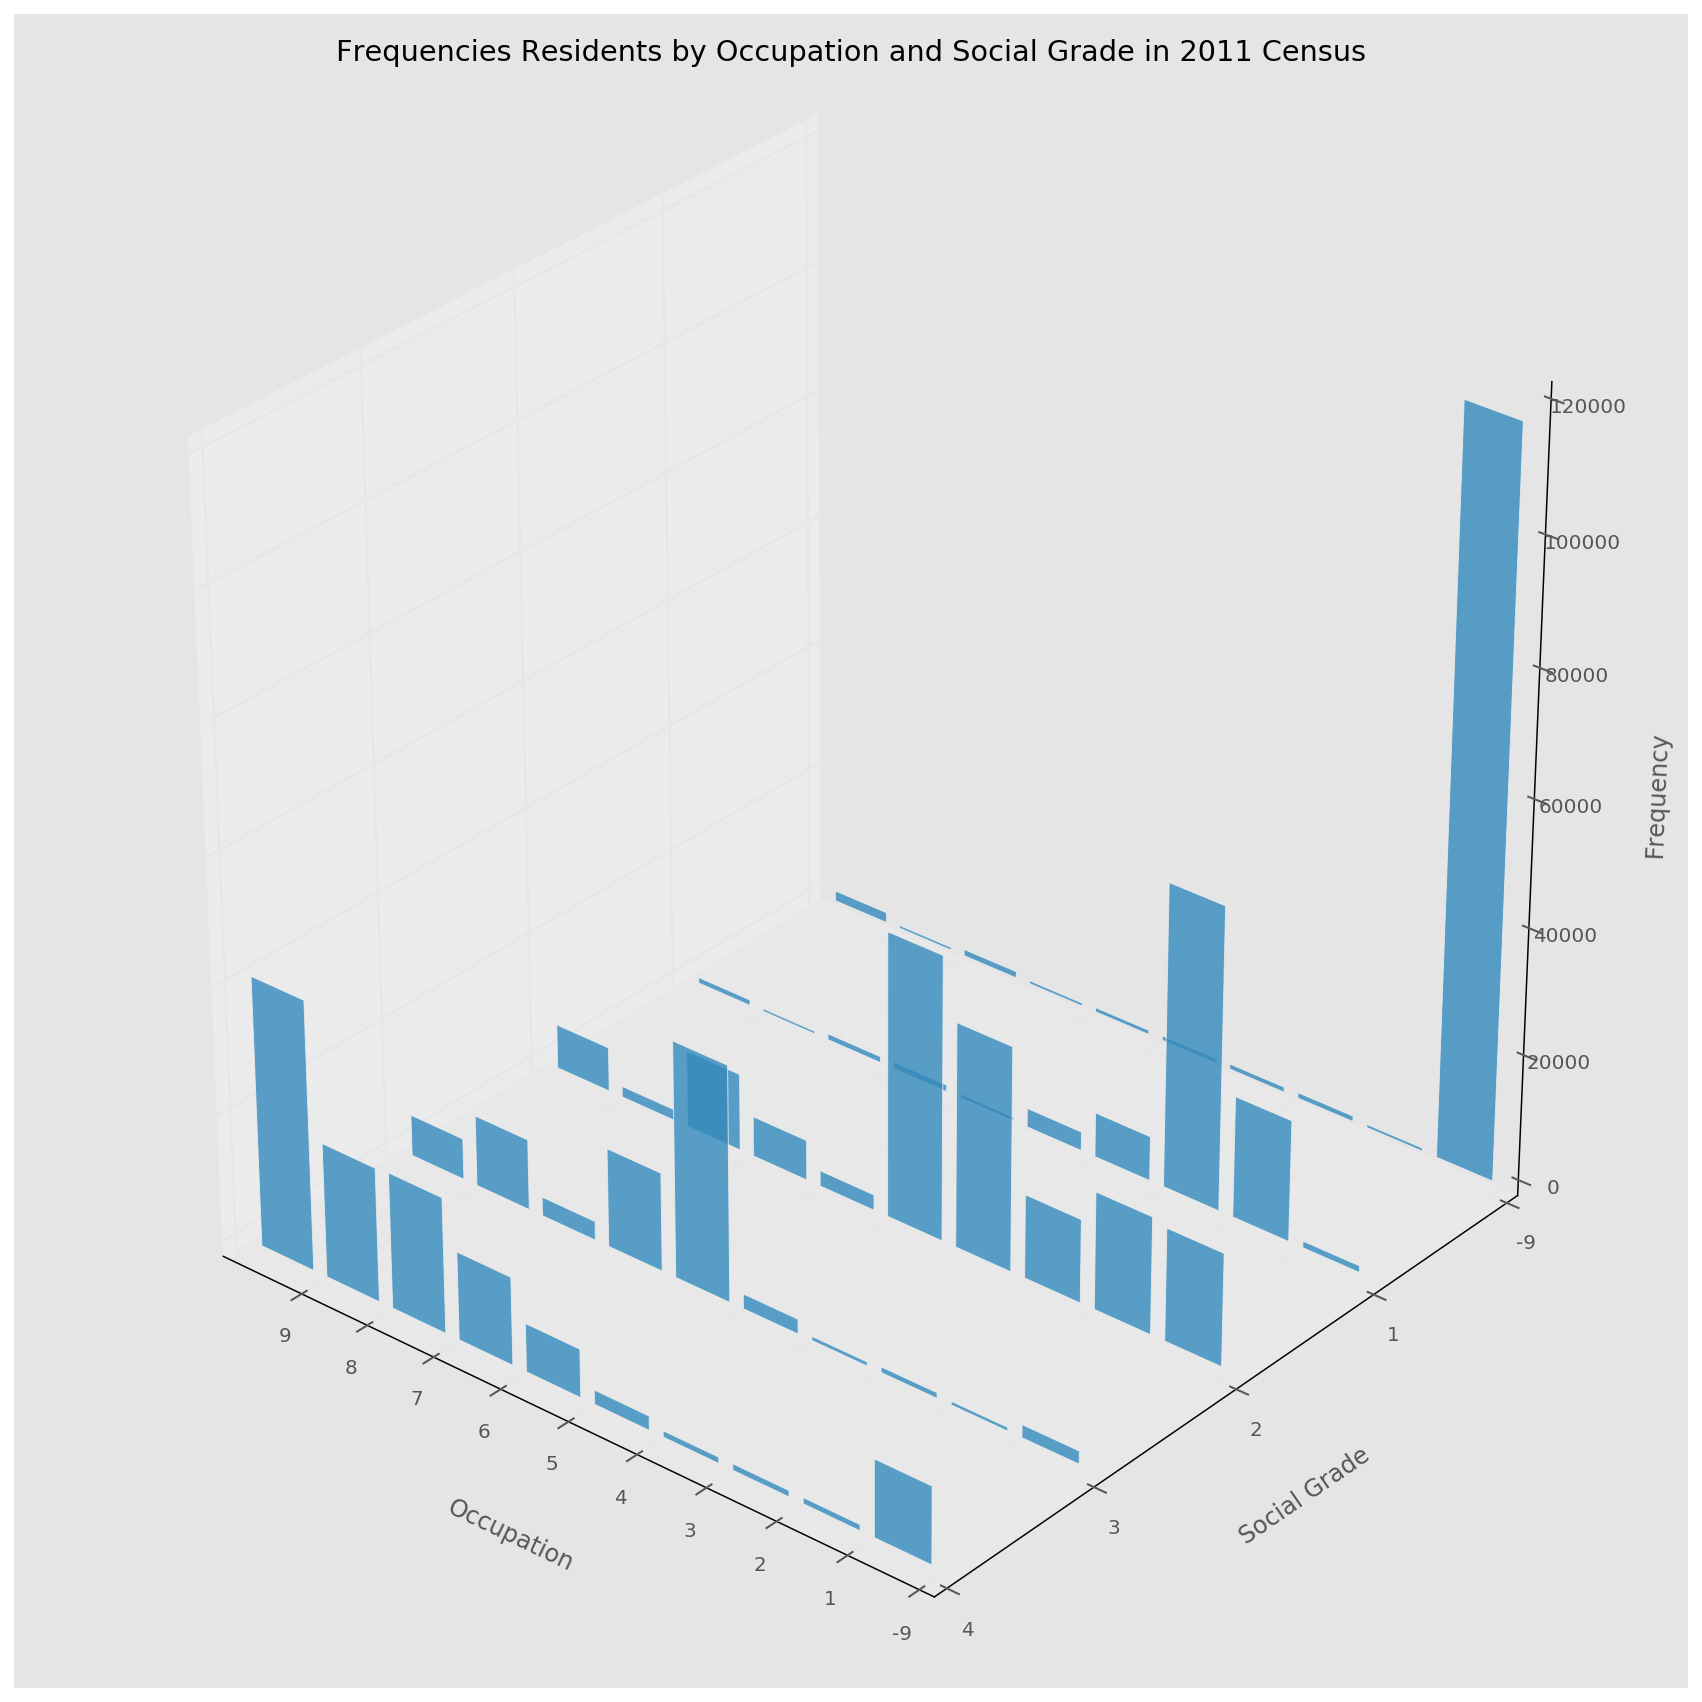

In [23]:
plt.figure(figsize=(15, 15))
plotting_3D.plot_3d_table_count(
        df,
        'Occupation',
        'Approximated Social Grade',
        'Frequencies Residents by Occupation and Social Grade in 2011 Census',
        'Occupation',
        'Social Grade',
        rotation=(30, 130)
);

### 4. ipywidgets

This section required the use of ipywidgets to analyse the number of people working in industry for different regions and ages.  Both age range and industry are listed in the drop down boxes below, and their selection will update the plot shown.

In [24]:
def industry_func(region, age):
    """Plot a frequency bar chart broken down by region, for a given age group."""
    
    # Filter the data.
    filtered = df_translated[(df_translated['Region'] == region) & (df_translated['Age'] == age)]
    
    # Plot.
    name = "Industry count of ages " + age +" in " + region
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        filtered, 
        'Industry', 
        name,
        wrap_chars = 20
    )
    
    # Flush existing figures to avoid build up.
    flush_figures()

# Set up the ipywidget.
region_values = df_translated.Region.unique().tolist()
age_values = df_translated.Age.unique().tolist()
interact(industry_func, region=region_values, age=age_values);

### 5. Plotting data on a map

This extension required data relating to different regions to be displayed on a map.  The `matplotlib` extension library named `basemap` was used for this purpose.

`basemap` provides standard functionality that allows maps to be drawn with features that include coastlines and country borders.  For producing choropleth maps that communicate information about individual regions, shapefiles had to be used.  These are files that represent polygons (corresponding to some geographic body of interest) as a series of points with latitudes and longitudes, which can be manipulated according to values contained in specified datasets.

For this investigation, shapefiles of the government office regions (GORs) for English census regions were obtained from datashare.is.ed.ac.uk/handle/10283/2404.  Unfortunately, this dataset did not include Wales -- so the analysis was focused only on regions in England.

The following function was written to plot the populations of each region on a map of England:

In [25]:
if mapping_installed:
    print(inspect.getsource(mapping))
else:
    print("Mapping capabilities are not installed.")

Mapping capabilities are not installed.


The map was then generated by running the function:

In [26]:
if mapping_installed:
    mapping.plot_population_map(df_translated, "../data/regions")
    plt.show()
else:
    print("Mapping capabilities are not installed.")

Mapping capabilities are not installed.


### 6. Analysis of alternate dataset

The dataset chosen to analyse as an extension contained all balls bowled in the group stages of the 2016 Indian Premier League T20 cricket league.  The data was obtained from cricsheet.org/downloads/ipl.zip.  All .csv files not from the group stages were filtered out, and then the remaining files were read into the program.

In [27]:
IPLData = cricket.get_data("./data/cricket_data")
IPLData.head()

,Match Number,Winner,Venue,Innings,Bowling Team,Ball No.,Batting Team,Striker,Non - Striker,Bowler,Runs,Extras,How Out,Batsman Out
2182,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.1,Mumbai Indians,LMP Simmons,RG Sharma,RP Singh,1,0,-,-
2183,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.2,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,0,0,-,-
2184,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.3,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,2,0,-,-
2185,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.4,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,4,0,-,-
2186,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.5,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,1,0,-,-


When analysing each stadium, the data had to be processed to account of the fact that different numbers of matches were played at each.  To make the comparisons fair, all values were normalised to be per match.

In [28]:
num_games_at_venue = IPLData.drop_duplicates('Match Number')['Venue'].value_counts()
num_games_at_venue

Punjab Cricket Association IS Bindra Stadium, Mohali    7
Eden Gardens                                            7
M Chinnaswamy Stadium                                   7
Rajiv Gandhi International Stadium, Uppal               7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     6
Saurashtra Cricket Association Stadium                  5
Feroz Shah Kotla                                        5
Maharashtra Cricket Association Stadium                 4
Wankhede Stadium                                        4
Shaheed Veer Narayan Singh International Stadium        2
Green Park                                              2

The two most common numbers of runs scored off any given ball were dot balls and 1s -- which is logical, as they are the type of runs which are easiest to score for the batting team. 

In [29]:
def get_no_games(row):
    """Act on crosstab row to normalise the number of runs scored per ball per game."""
    
    # Normalise the row.
    venue_count = num_games_at_venue.index == row.name
    venue_count = num_games_at_venue[list(venue_count).index(True)]
    normalised = row / venue_count
    
    return normalised.astype(int)

# Create crosstab to give frequencies of runs scored per ball.
total_runs = IPLData['Runs'] + IPLData['Extras']
total_runs = total_runs.rename('No. Of Runs on Ball')
total_runs_stadium = pd.crosstab(IPLData['Venue'], total_runs)

# Remove single outlier.
del total_runs_stadium[7]

# Normalise rows and display.
total_runs_stadium = total_runs_stadium.apply(get_no_games, axis=1)
total_runs_stadium

No. Of Runs on Ball,0,1,2,3,4,5,6
Venue,,,,,,,
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,90,92,12,1,23,0,10
Eden Gardens,76,91,16,0,25,1,10
Feroz Shah Kotla,75,107,17,0,25,0,10
Green Park,82,93,7,0,30,1,10
M Chinnaswamy Stadium,73,100,13,0,30,0,18
Maharashtra Cricket Association Stadium,66,118,21,1,28,0,11
"Punjab Cricket Association IS Bindra Stadium, Mohali",67,107,24,0,32,0,7
"Rajiv Gandhi International Stadium, Uppal",83,97,18,1,23,0,8
Saurashtra Cricket Association Stadium,70,103,24,1,28,0,6


Examining the data, the ground at which there was the most number of sixes was the M Chinnaswamy stadium, a ground which has a reputation for being one of the highest scoring grounds in the country.  The first plot powered by ipywidgets allows the venue to be altered and the distribution of runs scored per ball to be observed:

In [30]:
def stadium_runs_func(venue):
    """Return a plot of the number of runs scored per ball, filtered by venue."""
    
    # Get filtered data.
    filtered = pd.DataFrame(total_runs_stadium.loc[venue])
    
    # Create axes and return.
    axes = filtered.plot(kind="barh", legend=False, figsize=(10, 10),
                         title="Average times runs were made per game at\n" + venue)
    axes.set_xlabel("Average number of occurrences per game")
    axes.set_ylabel("Runs per ball")
    flush_figures()

venues = list(total_runs_stadium.index)
interact(stadium_runs_func, venue=venues);

The second plot powered by ipywidgets inverts the selections, so the number of runs per ball can be cycled through to observe the differences between stadiums.  Again, the M Chinnaswamy stadium is revealed to be conmfortably the highest scoring ground -- in particular, with the number of sixes hit there dwarfing all other grounds.

In [31]:
def runs_ball_func(runs_per_ball):
    """Return a plot of the number of observations at each venue, filtered by number of runs scored per ball."""
    
    filtered = total_runs_stadium[int(runs_per_ball)]
    axes = filtered.plot(kind="barh", figsize=(10, 10),
                         title="Average times " + str(runs_per_ball) + " runs per ball were made")
    axes.set_xlabel("Average number of occurrences per game")
    axes.set_ylabel("Venue")
    flush_figures()
    
runs = list(total_runs_stadium.columns.values)
interact(runs_ball_func, runs_per_ball=runs);

Analysing the number of runs scored per ball across different over numbers, it can be seen that the frequency of boundaries increases as the over gets closer to the end of the game.  Furthermore -- in the middle overs (between overs 7 and 15), the number of 1s and 2s increases significantly as the batsmen look to try and rotate strike.  In the powerplay (the first 6 overs), there is an increased number of dots (0s) and boundaries (4s and 6s) when compared with the middle overs as the batsmen look to try and score when the fielding restrictions are in place.

The following crosstabs show this effect for the first 10 balls and last 10 balls of an innings.  In particular, the number of 0s is significantly higher at the start of the innings.

In [32]:
num_runs_by_ball = pd.crosstab(IPLData['Ball No.'], total_runs)
num_runs_by_ball.head(n=10)

No. Of Runs on Ball,0,1,2,3,4,5,6,7
Ball No.,,,,,,,,
0.1,69,26,3,0,12,2,0,0
0.2,64,28,4,0,14,1,1,0
0.3,56,30,8,1,16,0,1,0
0.4,62,26,6,0,16,0,2,0
0.5,56,40,4,2,8,0,2,0
0.6,54,37,6,0,14,0,1,0
0.7,9,6,0,0,1,1,1,0
0.8,3,0,0,0,1,0,0,0
0.9,1,0,0,0,0,0,0,0


In [33]:
num_runs_by_ball.tail(n=10)

No. Of Runs on Ball,0,1,2,3,4,5,6,7
Ball No.,,,,,,,,
18.7,2,7,2,0,4,0,5,0
18.8,2,1,2,0,0,0,0,0
18.9,1,0,0,0,0,0,0,0
19.1,13,33,16,0,12,0,4,0
19.2,17,35,10,0,5,0,7,0
19.3,22,28,5,0,9,0,9,0
19.4,22,26,8,0,5,0,10,0
19.5,18,24,16,0,8,0,5,0
19.6,11,27,14,1,10,0,5,0


The following plot shows the same effect, but with the option of using a slider ipywidget to change the over being analysed.

In [34]:
def over_num_func(over_number):
    """Return a plot of the number of runs scored per ball, filtered by over number."""
    
    # Retrive the relevant data.
    filtered = num_runs_by_ball[np.ceil(num_runs_by_ball.index) == over_number]
    
    # Remove outlier.
    del filtered[7]
    
    # Create axes and plot.
    axes = filtered.plot(kind="barh", figsize=(12, 12), title="Count of Run Type for each Ball in Over Number "+ str(over_number))
    axes.set_xlabel("Totals")
    axes.set_ylabel("Balls in over " + str(over_number))
    axes.legend(["Dot Ball", "One Run", "Two Runs", "Three Runs", "Four Runs", "Five Runs", "Six Runs"], loc='center left', bbox_to_anchor=(1.0, 0.5))
    flush_figures()
    
interact(over_num_func, over_number=(1, 20));

In terms of runs per innings, there are significantly more scored in the first innings overall.  This is as expected, given the fact that it is only possible for the team batting second to score a limited number of runs more than the team batting first (i.e. the game is over when the chasing team accumulates more runs than the team batting first).

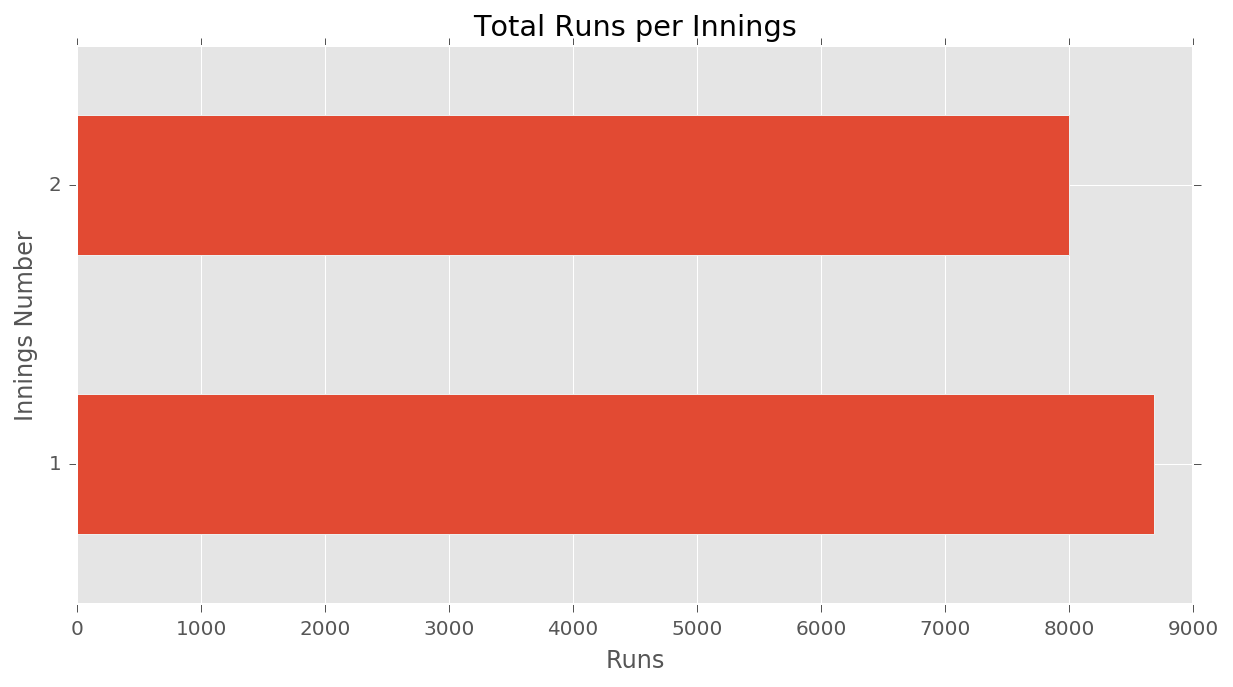

In [35]:
# Get runs per innings.
innings_runs = IPLData.groupby(['Innings'])['Runs'].sum()
innings_runs = pd.Series.to_frame(innings_runs)

# Plot runs per innings.
innings_runs_plot = innings_runs.plot(kind="barh", legend=False, figsize=(10, 5), title="Total Runs per Innings")
innings_runs_plot.set_xlabel("Runs")
innings_runs_plot.set_ylabel("Innings Number")
innings_runs_plot;

Analysing extras conceded by innings, it becomes apparent that there are far more extras in the second innings than the first.  This makes sense, as there is generally far more pressure on the bowling team in the second innings -- which would lead to more mistakes.

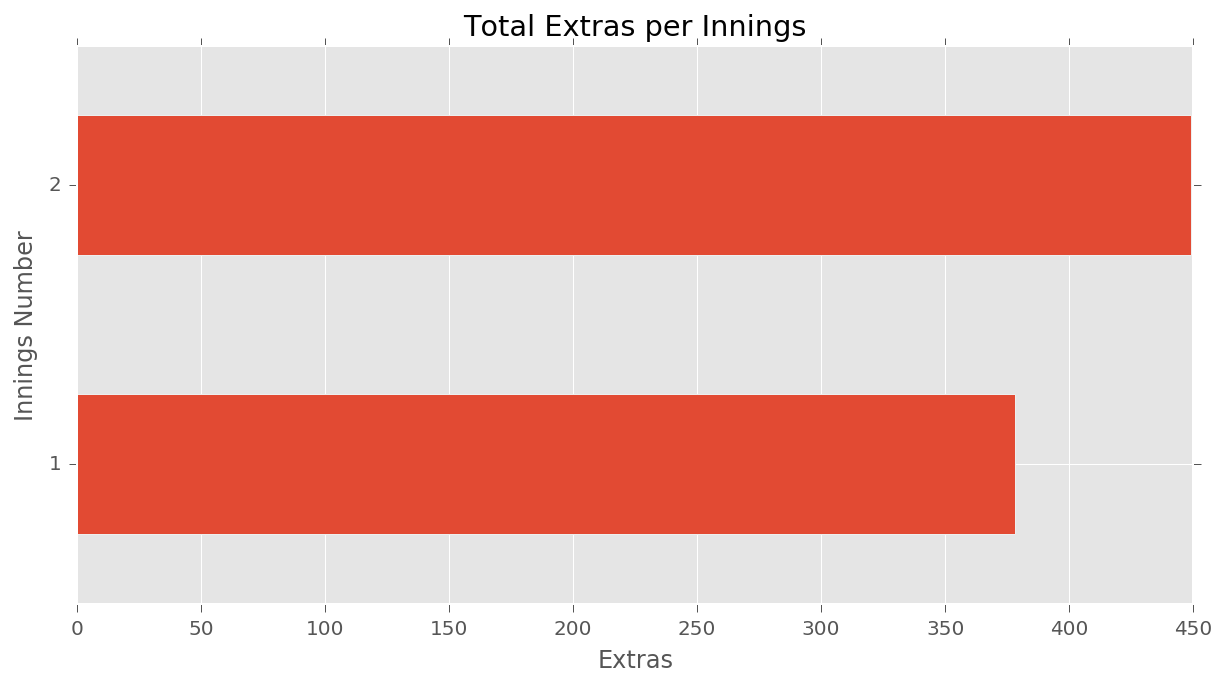

In [36]:
# Get extras per innings.
innings_extras = IPLData.groupby(['Innings'])['Extras'].sum()
innings_extras = pd.Series.to_frame(innings_extras)

# Plot extras per innings.
innings_extras_plot = innings_extras.plot(kind="barh", legend=False, figsize=(10, 5), title="Total Extras per Innings")
innings_extras_plot.set_xlabel("Extras")
innings_extras_plot.set_ylabel("Innings Number")
innings_extras_plot;

Comparing the types of the runs which were scored by each team revealed some interesting observations.  For each team, the most common number of runs scored on any ball were 0s and 1s.  This aligns with what would be expected -- the difficulty of scorign runs increases as the number of runs increases, so more runs are scored with lower frequency in general.

Interestingly, very few 3s were scored -- which may have been due to the fact that stadiums in India are quite small in general, and the ground is not big enough to allow the batsmen to run 3 runs.

The majority of teams scored similar amounts of each number of run.  However, there are certain anomalies -- for example, Mumbai and Kolkata scored significantly less 2s than the other teams and RCB scored more 4s and 6s than any other team.

In [37]:
# Type of Runs by Teams
team_runs = IPLData['Runs'] + IPLData['Extras']
team_runs = team_runs.rename('Count of Run Type')
team_run_types = pd.crosstab(IPLData['Batting Team'], team_runs)
team_run_types

Count of Run Type,0,1,2,3,4,5,6,7
Batting Team,,,,,,,,
Delhi Daredevils,561,704,127,2,180,6,65,0
Gujarat Lions,552,693,125,6,208,5,52,0
Kings XI Punjab,544,710,154,5,193,1,54,0
Kolkata Knight Riders,466,741,108,6,189,4,62,0
Mumbai Indians,625,667,92,7,186,4,93,0
Rising Pune Supergiants,521,685,123,9,173,1,68,0
Royal Challengers Bangalore,471,729,129,4,215,6,121,1
Sunrisers Hyderabad,576,691,139,9,181,6,65,0


The following table presents those bowlers who took the most wickest in the competition.  It can be seen that both RCB and Sunrisers Hyderabad have two entries in the top five.

In [38]:
def getBowlingTeam(row):
    
    record = allBowlers[allBowlers['Bowler'] == row.name]
    temp = record['Bowling Team']
    temp = temp.values 
    
    return temp

allBowlers = IPLData.drop_duplicates(subset = 'Bowler')
bowlerswickets = IPLData[((IPLData['How Out'] != '-') & (IPLData['How Out'] != 'run out'))]
allwickets = bowlerswickets['Bowler'].value_counts()
allwickets = pd.Series.to_frame(allwickets)
allwickets.insert(1,'Team',None)
allwickets = allwickets.sort_values('Bowler',ascending = 0)
allwickets['Team'] = allwickets.apply(getBowlingTeam, axis=1)
allwickets.head()

,Bowler,Team
YS Chahal,19,Royal Challengers Bangalore
B Kumar,18,Sunrisers Hyderabad
MJ McClenaghan,17,Mumbai Indians
SR Watson,16,Royal Challengers Bangalore
Mustafizur Rahman,16,Sunrisers Hyderabad


The following plot shows the same information but reveals how, interestingly, the best performing bowlers (with more than 15 wickets) are more sparesly represented than those bowlers with 15 and fewer wickets.

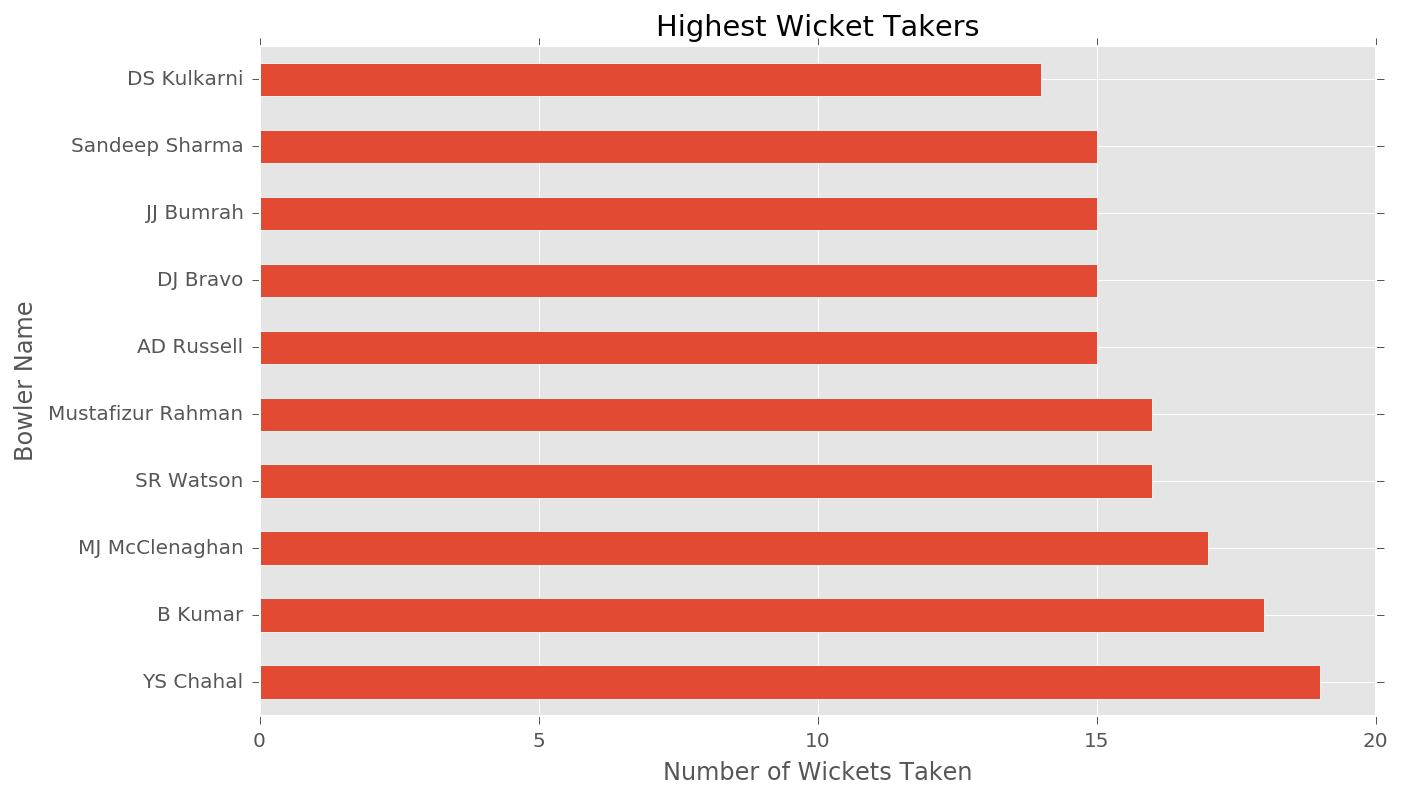

In [39]:
Top10WicketTakersGraph = allwickets.ix[:10].plot(kind = "Barh",figsize=(10,6),sort_columns = True,title =("Highest Wicket Takers"),legend = False)
Top10WicketTakersGraph.set_xlabel("Number of Wickets Taken")
Top10WicketTakersGraph.set_ylabel("Bowler Name")
Top10WicketTakersGraph;

Analysing the dataset split accordign to each team, we find a surprising trend.  For the teams who took the most wickets, these wickets were spread amongst many bowlers -- whereas in teams which did not take as many wickets, the large proportion of those wickets were shared out between 1 or 2 players.

In [40]:
def bowlingfunc(Team):
    
    teamNameWickets = bowlerswickets[bowlerswickets['Bowling Team'] == Team]
    name = "Total Wickets in " + Team
    plt.figure(figsize=(10, 7))
    plotting.plot_bar_group_count(
        teamNameWickets, 
        'Bowler', 
        name,
        wrap_chars = 20
    )
    flush_figures()
    
wickets = allwickets.Team.unique()
wickets = wickets.tolist()

interact(bowlingfunc, Team=wickets);

The top 10 run scorers for the IPL in 2016 were mainly in three categories.  The top player was Virat Kohli (an RCB player), who had an excellent IPL season and scored far more runs than any other player.  He was followed by 2 players who also had good seasons: AB de Villiers and David Warner.  There is a significant gap between these three players and the remainder of the competition.

In [41]:
# Find the top run scorers.
allBatsmen = IPLData.drop_duplicates(subset='Striker')

def getBattingTeam(row):
    record = allBatsmen[allBatsmen['Striker'] == row.name]
    teamName = record['Batting Team']
    teamName = teamName.values 
    return teamName

allBatsmen = IPLData.drop_duplicates(subset = 'Striker')
allruns = IPLData.groupby(['Striker'])['Runs'].sum()
allruns = pd.Series.to_frame(allruns)
allruns = allruns
allruns.insert(1,'Team',None)
allruns = allruns.sort_values('Runs',ascending =0)
allruns['Team'] = allruns.apply(getBattingTeam, axis=1)
allruns.head()

,Runs,Team
Striker,,
V Kohli,919,Royal Challengers Bangalore
DA Warner,658,Sunrisers Hyderabad
AB de Villiers,603,Royal Challengers Bangalore
RG Sharma,489,Mumbai Indians
AM Rahane,480,Rising Pune Supergiants


The following plot displays the same data, and shows the large gap between the top three scorers and the remainder of the batsmen in the IPL.

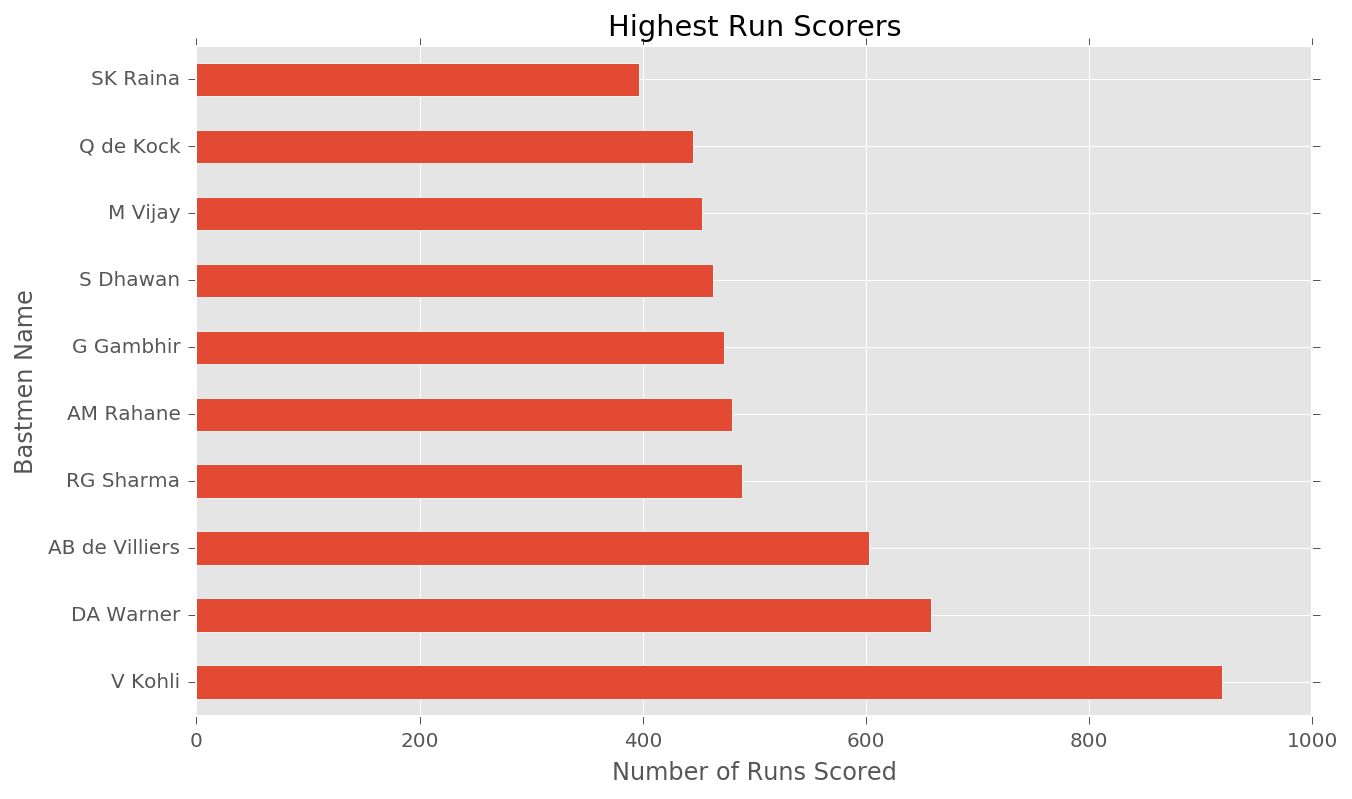

In [42]:
Top10RunScorersGraph = allruns.ix[:10].plot(kind="barh", figsize=(10, 6), sort_columns=True,
                                            title="Highest Run Scorers", legend = False)
Top10RunScorersGraph.set_xlabel("Number of Runs Scored")
Top10RunScorersGraph.set_ylabel("Bastmen Name")
Top10RunScorersGraph;

Analysing run scoring per team shows a few interesting trends.  In teams such as Royal Challangers Bangalore and the Sunrisers Hyderabad, multiple batsmen scored many more runs than any other people in the team.  In other teams (which did not make the playoffs), only a single batsmen scored the majority of the runs -- for example the Rising Pune Supergiants and the Mumbai Indians.  This suggests that to make more runs and win more games, a number of batsmen need to score many runs for the team. 

In [43]:
def runscorers(Team):
    teamNameRuns = allruns[allruns['Team'] == Team]
    teamRunsGraph = teamNameRuns.plot(kind = "Barh",figsize=(7,7),sort_columns = True,title =("Highest Run Scorers for " + Team),legend = False)
    teamRunsGraph.set_xlabel("Number of Runs Scored")
    teamRunsGraph.set_ylabel("Bastmen Name")
    flush_figures()
    
runs = allruns.Team.unique()
runs = runs.tolist()

interact(runscorers, Team=runs);

Looking at the number of runs each team scored, we find that the RCB scored significantly more runs than all of the other teams.  This could have been due to the fact that they played all of their home games at the M Chinnaswamy stadium (a significantly smaller ground than others used in the IPL) -- in addition to the RCB having 2 of the best batsmen playing for them.  All of the other teams are relatively closer together in terms of runs, which further exaggerates the number of runs which RCB made.

In [44]:
# Total Team Runs
teamruns = IPLData.groupby(['Batting Team'])['Runs'].sum()
teamruns = pd.Series.to_frame(teamruns)
teamruns = teamruns.sort_values('Runs',ascending = 0)
teamruns

,Runs
Batting Team,
Royal Challengers Bangalore,2529
Mumbai Indians,2092
Kings XI Punjab,2051
Sunrisers Hyderabad,2038
Gujarat Lions,2014
Kolkata Knight Riders,2002
Delhi Daredevils,1995
Rising Pune Supergiants,1962


The following plot shows the same data, but emphasises just how dominant RCB were in terms of run scoring.

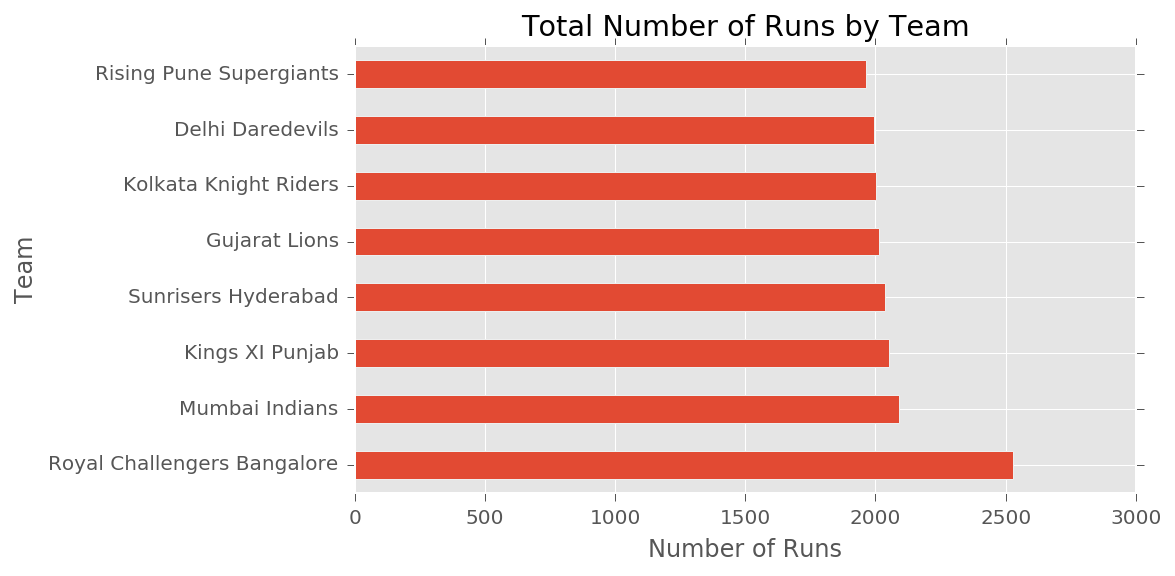

In [45]:
teamRunsGraph = teamruns.plot(kind = "barh",legend = False,title = "Total Number of Runs by Team",figsize=(7,4))
teamRunsGraph.set_xlabel("Number of Runs")
teamRunsGraph.set_ylabel("Team")
teamRunsGraph;

The team which had the most extras was the Kolkata Knight Riders, and the other teams were all relatively even -- aside from RCB and Kings XI Punjab, who had the lowest number of extras throughout the season.

In [46]:
# Total Team Extras
teamextras = IPLData.groupby(['Batting Team'])['Extras'].sum()
teamextras = pd.Series.to_frame(teamextras)
teamextras = teamextras.sort_values('Extras',ascending = 0)
teamextras

,Extras
Batting Team,
Kolkata Knight Riders,121
Gujarat Lions,116
Delhi Daredevils,109
Mumbai Indians,102
Sunrisers Hyderabad,102
Rising Pune Supergiants,101
Royal Challengers Bangalore,93
Kings XI Punjab,83


The Kolkata Knight Riders took the most wickets throughout the season.  They were followed by RCB, and both teams made the playoffs.  The teams which took the least number of wickets were Mumbai Indians and the Gujarat Lions, although surprisingly the Gujarat Lions were the team which had the highest number of wins.  This shows that they were extremely reliant on their batting to win their games -- something which was furthered by the fact that they only won 1 game batting first, meaning that their bowling lineup was unable to take wickets and win games. 

In [47]:
# Total Team Wickets
teamwickets = IPLData[((IPLData['How Out'] != '-'))]
teamwickets = teamwickets['Bowling Team'].value_counts()
teamwickets = pd.Series.to_frame(teamwickets)
teamwickets = teamwickets.sort_values('Bowling Team',ascending = 0)
teamwickets

,Bowling Team
Kolkata Knight Riders,86
Royal Challengers Bangalore,82
Delhi Daredevils,77
Rising Pune Supergiants,76
Sunrisers Hyderabad,76
Kings XI Punjab,73
Gujarat Lions,69
Mumbai Indians,68


Examining the total number of wins by team, the 4 teams which were in the playoff stages were the 4 teams with the most wins in the group stages.  The eventual winners, however, were not the Gujrat Lions but rather the Sunrisers Hydrabad -- which highlights the unpredictability of the playoff stage.

In [48]:
#number of wins per team 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
teamwins = allwins['Winner'].value_counts()
teamwins = teamwins.rename('Wins')
teamwins = pd.Series.to_frame(teamwins)
teamwins = teamwins.rename(columns = {'Batting Team':'Wins'})
teamwins

,Wins
Gujarat Lions,9
Sunrisers Hyderabad,8
Royal Challengers Bangalore,8
Kolkata Knight Riders,8
Mumbai Indians,7
Delhi Daredevils,7
Rising Pune Supergiants,5
Kings XI Punjab,4


Examining the wins batting first or batting second, all teams apart from the RCB have a higher win ratio batting second.  This is most likely due to the fact that their players were less comfortable chasing a concrete target and dealing with the mental pressure it can stimulate.  Some teams had a significant difference in the number of wins batting first or second -- for example the Gujarat Lions (who won almost exclusively while batting second). 

In [49]:
#Wins By Batting First or second 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
winsBatting = allwins[(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Batting Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Bowling Team']))]
winsBatting = winsBatting['Winner'].value_counts()
winsBatting = pd.Series.to_frame(winsBatting)
winsBatting['Won Batting Second'] = allwins['Winner'][(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Bowling Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Batting Team']))].value_counts()
winsBatting = winsBatting.rename(columns = {'Winner':'Won Batting First'})
winsBatting

,Won Batting First,Won Batting Second
Royal Challengers Bangalore,5,3
Sunrisers Hyderabad,3,5
Mumbai Indians,2,5
Delhi Daredevils,2,5
Kolkata Knight Riders,2,6
Kings XI Punjab,2,2
Gujarat Lions,1,8


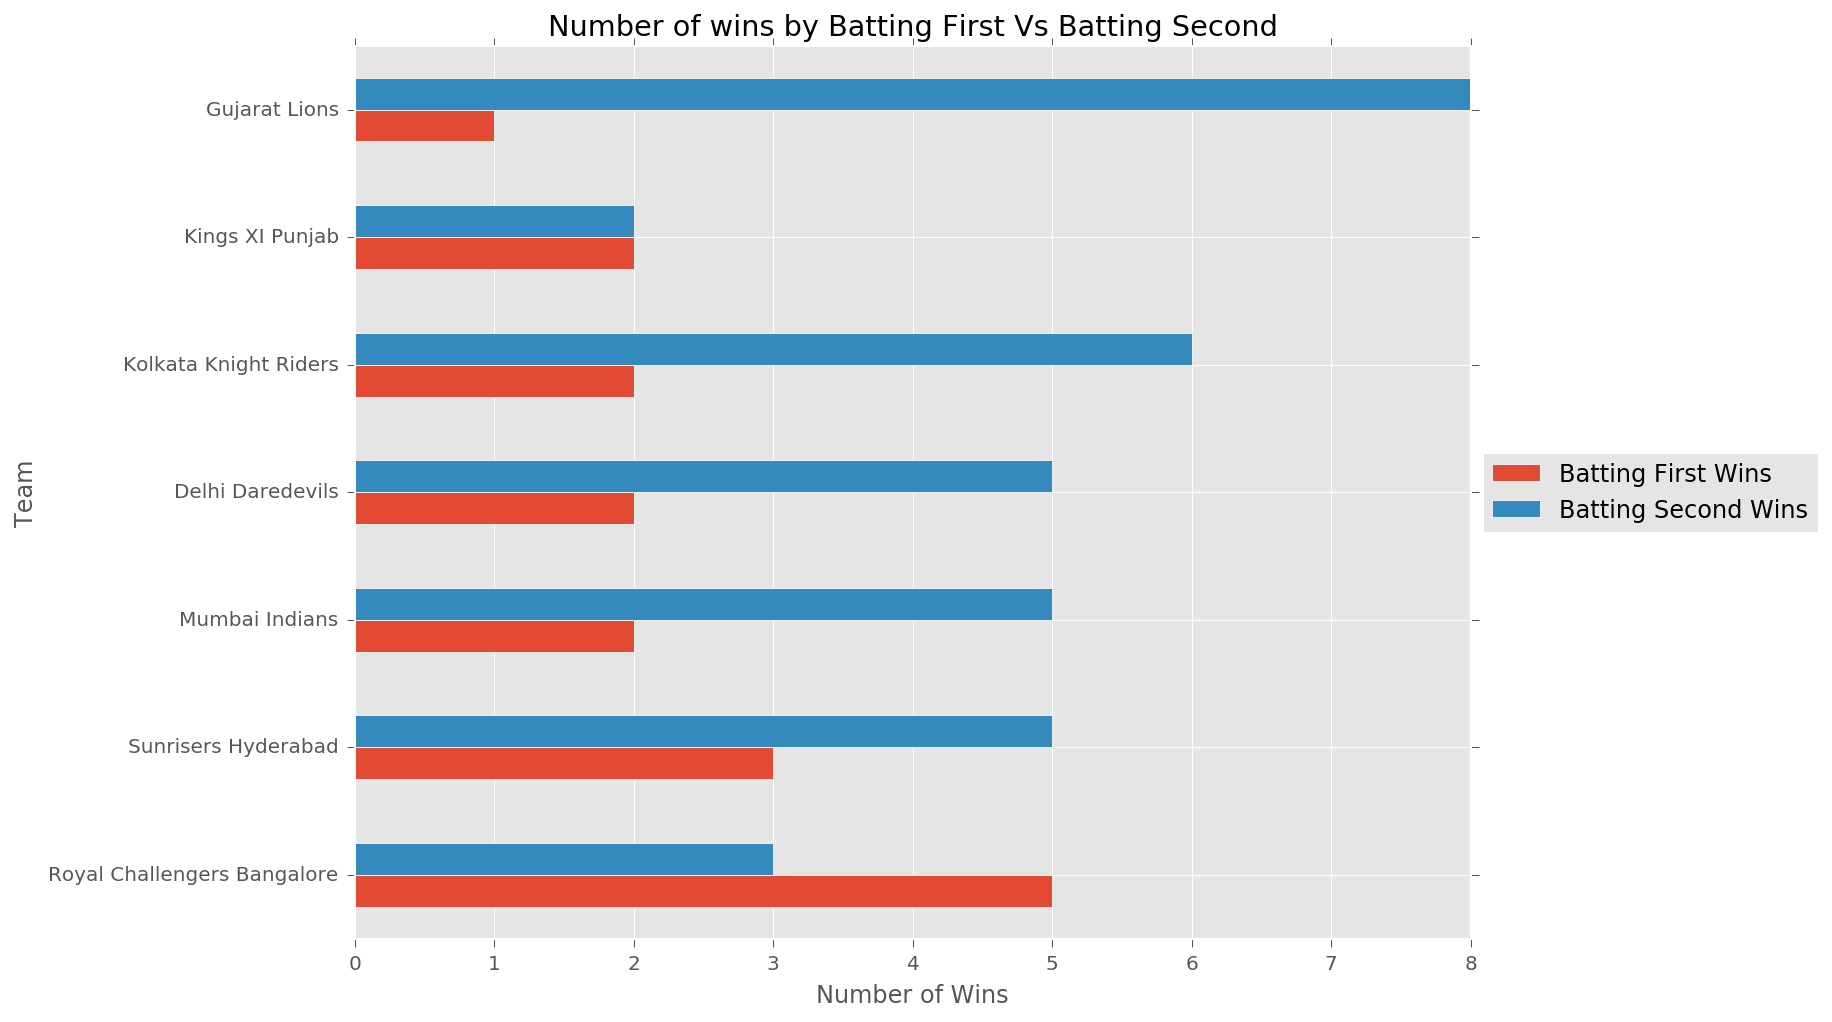

In [50]:
winsBattingGraph = winsBatting.plot(kind = "Barh",legend = False,figsize=(10,8), title = "Number of wins by Batting First Vs Batting Second")
winsBattingGraph.set_xlabel("Number of Wins")
winsBattingGraph.set_ylabel("Team")
winsBattingGraph.legend(["Batting First Wins","Batting Second Wins"],loc='center left', bbox_to_anchor=(1.0, 0.5))
winsBattingGraph;